# **STOXX 600 — Financial Statement Analysis (2021–2023)**  
**By:** Piyush Nandwani, Ajay Kumar, Osama Elmihy  


#### OVERVIEW
This project focuses on analysing the financial performance of companies listed in the STOXX 600 index, which represents major publicly traded firms across Europe.
The objective was to collect, clean, and organise the financial statement data of these companies and convert it into a structured dataset that can be used for analysis.

We begin by importing multiple raw datasets containing company identifiers, financial items, and industry classifications. Since the data comes in different formats and not every company reports the same items, a large part of the project involves data cleaning, standardisation, and merging. This includes fixing company names, reshaping the financial data into a usable format, and aligning it with metadata such as country and industry. We then conducted sanity checks on a few randomly choosed companies for confirming the accuracy of the data.

After preparing the dataset, we compute key financial ratios—such as profitability, leverage, liquidity, and efficiency metrics. These ratios allow us to compare companies, industries, and countries across the years 2021, 2022, and 2023.

Finally, using the cleaned dataset and computed ratios, we explore patterns in the STOXX 600 by generating tables and visualisations.
This helps provide an organised overview of which firms and sectors perform well, how companies differ across countries, and how financial characteristics evolve over time.

## DATA PREPARATION


In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()
os.chdir("/Users/piyushnandwani/Documents/data analytics financial")

In [3]:
# -----------------------------------------
# IMPORTANT NOTE FOR RUNNING THIS NOTEBOOK
# -----------------------------------------
# The file paths used below are based on my local computer.
# If the code does not run on your system, please do the following:
#
# 1. Check your working directory:
#    import os
#   os.getcwd()
#
# 2. If needed, change the working directory to the folder where 
#    your Excel files are stored:
#       os.chdir("path/to/your/folder")
#
# 3. Alternatively, you can replace the file paths in pd.read_excel()
#    with the correct full path on your computer.
#
# 4. Make sure the following files are in the same folder:
#       - EuroSTOXX600_BalanceSheetItems.xlsx
#       - FirmNames.xlsx
#
# After updating the paths, rerun the cell.
# -----------------------------------------

#---------------
# Loading data
#---------------

# Read all sheets from main financial file
sheets = pd.read_excel('EuroSTOXX600_BalanceSheetItems.xlsx', sheet_name=None)

const2021 = sheets["Constituents2021"]
identifiers = sheets["Constituents_Identifiers"]
financial_raw = sheets["FinancialData"]
industry_map = sheets["IndustryClassifier2021"]
industries = sheets["Industries"]

# Firm names file
firmnames = pd.read_excel('FirmNames.xlsx')


In [4]:
financial = financial_raw.copy()

In [5]:
#-------------------------------
# DATA CHECKS AND CLEANING
#-------------------------------

In [6]:
# Remove rows with "#ERROR"
financial = financial[~financial["Name"].str.contains("ERROR", na=False)]


In [7]:
#splitting Name in financial data into company name and label
company_list = firmnames["FinancialData"].dropna().unique().tolist()

def split_by_company_lookup(full):
    # try longest-first matching
    matches = [c for c in company_list if isinstance(full, str) and full.startswith(c)]
    if matches:
        company = max(matches, key=len)               # longest match
        label = full[len(company):].lstrip(" -")      # remove leading separator and spaces
        return company, label
    # fallback to rsplit if no match
    if isinstance(full, str):
        parts = full.rsplit(" - ", n=1)
        return parts[0], parts[1] if len(parts)>1 else ("", full)
    return (None, None)

financial[["Company", "Label"]] = financial["Name"].apply(
    lambda x: pd.Series(split_by_company_lookup(x))
)


In [8]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16823 entries, 0 to 23397
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     16823 non-null  object 
 1   2021     16798 non-null  object 
 2   2022     16599 non-null  float64
 3   2023     16299 non-null  float64
 4   Company  16823 non-null  object 
 5   Label    16823 non-null  object 
dtypes: float64(2), object(4)
memory usage: 920.0+ KB


In [9]:
#--------------------------------------
#MERGING DATA INTO ONE DATA FRAME
#--------------------------------------
# Used 'Company' from the financial table and 'FinancialData' from the firmnames table to join both tables.

financial = financial.merge(
    firmnames,
    left_on="Company",
    right_on="FinancialData",
    how="left"
)


In [10]:
#We checked for missing values in our dataframe and we found Constutuents_Identifiers to have some null values which meant 
#they didnt match their name with the 
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16823 entries, 0 to 16822
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16823 non-null  object 
 1   2021                      16798 non-null  object 
 2   2022                      16599 non-null  float64
 3   2023                      16299 non-null  float64
 4   Company                   16823 non-null  object 
 5   Label                     16823 non-null  object 
 6   FinancialData             16823 non-null  object 
 7   Constituents_Identifiers  16802 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [11]:
financial[financial["Constituents_Identifiers"].isna()]


,Name,2021,2022,2023,Company,Label,FinancialData,Constituents_Identifiers
11570,POWSZECHNY ZAKLAD - COMMON SHAREHOLDERS' EQUITY,18220000,1.994400e+07,3.097000e+07,POWSZECHNY ZAKLAD,COMMON SHAREHOLDERS' EQUITY,POWSZECHNY ZAKLAD,NaN
11571,POWSZECHNY ZAKLAD - TOTAL ASSETS,396468000,4.289650e+08,4.656860e+08,POWSZECHNY ZAKLAD,TOTAL ASSETS,POWSZECHNY ZAKLAD,NaN
11572,POWSZECHNY ZAKLAD - TOTAL DEBT,15099000,2.037600e+07,2.219900e+07,POWSZECHNY ZAKLAD,TOTAL DEBT,POWSZECHNY ZAKLAD,NaN
11573,POWSZECHNY ZAKLAD - TOTAL LIABILITIES,355334000,3.867580e+08,4.042590e+08,POWSZECHNY ZAKLAD,TOTAL LIABILITIES,POWSZECHNY ZAKLAD,NaN
11574,POWSZECHNY ZAKLAD - NET INCOME - BASIC,3336000,3.374000e+06,5.766000e+06,POWSZECHNY ZAKLAD,NET INCOME - BASIC,POWSZECHNY ZAKLAD,NaN
11575,POWSZECHNY ZAKLAD - NET INCOME AVAILABLE TO CO...,3336000,3.374000e+06,5.766000e+06,POWSZECHNY ZAKLAD,NET INCOME AVAILABLE TO COMMON,POWSZECHNY ZAKLAD,NaN
11576,POWSZECHNY ZAKLAD - NET INCOME (U.S.$),826561,7.701490e+05,1.464968e+06,POWSZECHNY ZAKLAD,NET INCOME (U.S.$),POWSZECHNY ZAKLAD,NaN
11577,POWSZECHNY ZAKLAD - NET SALES OR REVENUES,39614000,4.812700e+07,5.979800e+07,POWSZECHNY ZAKLAD,NET SALES OR REVENUES,POWSZECHNY ZAKLAD,NaN
11578,POWSZECHNY ZAKLAD - EARNINGS BEF INTEREST & TAXES,7828000,1.160600e+07,2.406100e+07,POWSZECHNY ZAKLAD,EARNINGS BEF INTEREST & TAXES,POWSZECHNY ZAKLAD,NaN
11579,POWSZECHNY ZAKLAD - EBIT & DEPRECIATION,9185000,1.293400e+07,2.544700e+07,POWSZECHNY ZAKLAD,EBIT & DEPRECIATION,POWSZECHNY ZAKLAD,NaN


In [12]:
financial['Constituents_Identifiers'].nunique()

592

In [13]:
## after checking with the file, we got to know that eight companies in the data for which the names didn't match
## it was because of the reason that for one the name for not given which we found through the above code and for the rest 
##it was simple given by '.', and we did't get the desired names of all the companies.

In [14]:
financial[financial['Constituents_Identifiers'] == "."]



,Name,2021,2022,2023,Company,Label,FinancialData,Constituents_Identifiers
1810,AVAST PLC - COMMON SHAREHOLDERS' EQUITY,1059948,NaN,NaN,AVAST PLC,COMMON SHAREHOLDERS' EQUITY,AVAST PLC,.
1811,AVAST PLC - TOTAL ASSETS,2035428,NaN,NaN,AVAST PLC,TOTAL ASSETS,AVAST PLC,.
1812,AVAST PLC - CURRENT ASSETS - TOTAL,397213,NaN,NaN,AVAST PLC,CURRENT ASSETS - TOTAL,AVAST PLC,.
1813,AVAST PLC - TOTAL DEBT,619578,NaN,NaN,AVAST PLC,TOTAL DEBT,AVAST PLC,.
1814,AVAST PLC - TOTAL LIABILITIES,975480,NaN,NaN,AVAST PLC,TOTAL LIABILITIES,AVAST PLC,.
...,...,...,...,...,...,...,...,...
13438,SIGNA - GROSS INCOME,318270,490298.0,NaN,SIGNA,GROSS INCOME,SIGNA,.
13439,SIGNA - RETAINED EARNINGS,-251038,-138192.0,NaN,SIGNA,RETAINED EARNINGS,SIGNA,.
13440,SIGNA - RECEIVABLES(NET),187484,252566.0,NaN,SIGNA,RECEIVABLES(NET),SIGNA,.
13441,SIGNA - CASH - GENERIC,197313,331875.0,NaN,SIGNA,CASH - GENERIC,SIGNA,.


In [15]:
financial.loc[
    financial['Constituents_Identifiers'].str.strip() == ".",
    'Company'
].unique()


array(['AVAST PLC', 'INDUSTRI', 'COMPAGNIE', 'POWSZECHNA KASA',
       'INTERNATIONAL', 'COMPAGNIE DE', 'SIGNA'], dtype=object)

In [16]:
## Since these were only 8 companies, we assigned them names manually from the FinancialData company names.
# 1. AVAST PLC -> AVAST DEAD - DELIST.13/09/22
financial.loc[financial["Company"] == "AVAST PLC", "Constituents_Identifiers"] = "AVAST DEAD - DELIST.13/09/22"

# 2. INDUSTRI -> INDITEX
financial.loc[financial["Company"] == "INDUSTRI", "Constituents_Identifiers"] = "INDITEX"

# 3. COMPAGNIE -> MICHELIN
financial.loc[financial["Company"] == "COMPAGNIE", "Constituents_Identifiers"] = "MICHELIN"

# 4. POWSZECHNA KASA -> PKO BANK
financial.loc[financial["Company"] == "POWSZECHNA KASA", "Constituents_Identifiers"] = "PKO BANK"

# 5. POWSZECHNY ZAKLAD -> PZU GROUP
financial.loc[financial["Company"] == "POWSZECHNY ZAKLAD", "Constituents_Identifiers"] = "PZU GROUP"

# 6. INTERNATIONAL -> INTERNATIONAL DISTRIBUTIONS
financial.loc[financial["Company"] == "INTERNATIONAL", "Constituents_Identifiers"] = "INTERNATIONAL DISTRIBUTIONS"

# 7. COMPAGNIE DE -> SAINT GOBAIN
financial.loc[financial["Company"] == "COMPAGNIE DE", "Constituents_Identifiers"] = "SAINT GOBAIN"

# 8. SIGNA -> SIGNATURE AVIATION DEAD - DELIST.02/06/21
financial.loc[financial["Company"] == "SIGNA", "Constituents_Identifiers"] = "SIGNATURE AVIATION DEAD - DELIST.02/06/21"



In [17]:
financial['Constituents_Identifiers'].nunique()

599

In [18]:
# confirmed with the data info to ensure data completion.
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16823 entries, 0 to 16822
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16823 non-null  object 
 1   2021                      16798 non-null  object 
 2   2022                      16599 non-null  float64
 3   2023                      16299 non-null  float64
 4   Company                   16823 non-null  object 
 5   Label                     16823 non-null  object 
 6   FinancialData             16823 non-null  object 
 7   Constituents_Identifiers  16823 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [19]:
## Used 'Constituents_Identifiers' from the financial table and 'NAME' from the identifiers table to join both tables.
financial = financial.merge(
    identifiers,
    left_on="Constituents_Identifiers",
    right_on="NAME",
    how="left"
)

## Used 'ISIN CODE' from the financial table and 'ISIN' from the industry_map table to join both tables.
financial = financial.merge(
    industry_map,
    left_on="ISIN CODE",
    right_on="ISIN",
    how="left"
)

## Used 'INDUSTRY GROUP' from the financial table and 'INDG' from the industries table to join both tables.

financial = financial.merge(
    industries,
    left_on="INDUSTRY GROUP",
    right_on="INDG",
    how="left",
)

In [20]:
pd.set_option("Display.max_rows", 70)
pd.set_option("Display.max_columns", None)


In [21]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35643 entries, 0 to 35642
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      35643 non-null  object 
 1   2021                      35593 non-null  object 
 2   2022                      35220 non-null  float64
 3   2023                      34582 non-null  float64
 4   Company                   35643 non-null  object 
 5   Label                     35643 non-null  object 
 6   FinancialData             35643 non-null  object 
 7   Constituents_Identifiers  35643 non-null  object 
 8   nan                       35643 non-null  object 
 9   ISIN CODE                 35643 non-null  object 
 10  NAME                      35643 non-null  object 
 11  ISIN                      35643 non-null  object 
 12  INDUSTRY GROUP            35643 non-null  int64  
 13  SIC CODE 1                35643 non-null  int64  
 14  SIC CO

In [22]:
## we observed an column "nan" which was a company identification number, so we renamed it as International Identification number.
financial.columns = financial.columns.fillna("International Identification number")


In [23]:
financial.columns

Index([                               'Name',
                                        2021,
                                        2022,
                                        2023,
                                   'Company',
                                     'Label',
                             'FinancialData',
                  'Constituents_Identifiers',
       'International Identification number',
                                 'ISIN CODE',
                                      'NAME',
                                      'ISIN',
                            'INDUSTRY GROUP',
                                'SIC CODE 1',
                                'SIC CODE 2',
                                'SIC CODE 3',
                                    'INDM_x',
                                  'ICB Code',
                                      'INDG',
                                      'INDC',
                                    'INDM_y',
                   'Datastream Sec

In [24]:
##converted all column names to strings
financial.columns = financial.columns.astype(str)

In [25]:
# there was some duplication in columns as we merged the different data sheets, we kept the required ones and dropped others.
keep_cols = [
    "2021", "2022", "2023",
    "Label",
    "International Identification number",
    "ISIN",
    "NAME",
    "INDUSTRY GROUP",
    "SIC CODE 1", "SIC CODE 2", "SIC CODE 3",
    "INDM_x",
    "ICB Code",
    "INDG",
    "INDC",
    "Datastream Sector Level"
]

financial = financial[keep_cols]

In [26]:
financial.columns

Index(['2021', '2022', '2023', 'Label', 'International Identification number',
       'ISIN', 'NAME', 'INDUSTRY GROUP', 'SIC CODE 1', 'SIC CODE 2',
       'SIC CODE 3', 'INDM_x', 'ICB Code', 'INDG', 'INDC',
       'Datastream Sector Level'],
      dtype='object')

In [27]:
## Rename columns
rename_map = {
    "Label": "Particulars",
    "International Identification number": "CUSIP",
    "NAME": "Company",
    "INDUSTRY GROUP": "IndustryGroup",
    "SIC CODE 1": "SICCode1",
    "SIC CODE 2": "SICCode2",
    "SIC CODE 3": "SICCode3",
    "ICB Code": "ICB_Code",
    "INDM_x": "INDM",
    "Datastream Sector Level": "Datastream_Sector_Level"
}
financial = financial.rename(columns=rename_map)


In [28]:
financial.columns

Index(['2021', '2022', '2023', 'Particulars', 'CUSIP', 'ISIN', 'Company',
       'IndustryGroup', 'SICCode1', 'SICCode2', 'SICCode3', 'INDM', 'ICB_Code',
       'INDG', 'INDC', 'Datastream_Sector_Level'],
      dtype='object')

In [29]:
#Changing order
order = [
    "ISIN", "CUSIP", "Company",
    "IndustryGroup",
    "SICCode1",
    "SICCode2",
    "SICCode3",
    "INDM", "ICB_Code","INDG", "INDC", "Datastream_Sector_Level","Particulars", "2021",
    "2022", "2023"
]

financial = financial[order]    

In [30]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35643 entries, 0 to 35642
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISIN                     35643 non-null  object 
 1   CUSIP                    35643 non-null  object 
 2   Company                  35643 non-null  object 
 3   IndustryGroup            35643 non-null  int64  
 4   SICCode1                 35643 non-null  int64  
 5   SICCode2                 31220 non-null  float64
 6   SICCode3                 24955 non-null  float64
 7   INDM                     35643 non-null  object 
 8   ICB_Code                 18820 non-null  float64
 9   INDG                     35643 non-null  int64  
 10  INDC                     35643 non-null  object 
 11  Datastream_Sector_Level  35643 non-null  int64  
 12  Particulars              35643 non-null  object 
 13  2021                     35593 non-null  object 
 14  2022                  

In [31]:
## converting year values to numeric and replacing blanks with NaN and keeping dtype as floats
cols = ["2021", "2022", "2023"]

for col in cols:
    financial[col] = financial[col].replace(r'^\s*$', np.nan, regex=True) #replaced blanks
    financial[col] = pd.to_numeric(financial[col], errors='coerce') #Convert to numeric
    financial[col] = financial[col].astype("Float64") #Convert to float


/var/folders/y3/9gvskmz92w9497s4v4tvb1k80000gn/T/ipykernel_31775/883385897.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  financial[col] = financial[col].replace(r'^\s*$', np.nan, regex=True) #replaced blanks


In [32]:
# converted to desired dtypes, with identifiers as strings while keeping categories as integers so as to keep flexibility while sorting.
financial["ISIN"] = financial["ISIN"].astype(str).str.strip()
financial["CUSIP"] = financial["CUSIP"].astype(str).str.strip()
financial["Company"] = financial["Company"].astype(str).str.strip()
financial["IndustryGroup"] = (pd.to_numeric(financial["IndustryGroup"], errors="coerce").astype("Int64"))
financial["SICCode2"] = (pd.to_numeric(financial["SICCode2"], errors="coerce").astype("Int64"))
financial["SICCode3"] = (pd.to_numeric(financial["SICCode3"], errors="coerce").astype("Int64"))
financial["INDM"] = financial["INDM"].astype(str).str.strip()
financial["ICB_Code"] = (pd.to_numeric(financial["ICB_Code"], errors="coerce").astype("Int64"))
financial["INDG"] = (pd.to_numeric(financial["INDG"], errors="coerce").astype("Int64"))
financial["INDC"] = financial["INDC"].astype(str).str.strip()
financial["Datastream_Sector_Level"] = (pd.to_numeric(financial["Datastream_Sector_Level"], errors="coerce").astype("Int64"))
financial["Particulars"] = financial["Particulars"].astype(str).str.strip()



In [33]:
financial


,ISIN,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Particulars,2021,2022,2023
0,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,COMMON SHAREHOLDERS' EQUITY,9164000.0,12754000.0,16844000.0
1,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,TOTAL ASSETS,10333000.0,13947000.0,17819000.0
2,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,TOTAL DEBT,992000.0,989000.0,785000.0
3,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,TOTAL LIABILITIES,1169000.0,1193000.0,975000.0
4,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,NET INCOME - BASIC,1855000.0,4013000.0,4573000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35638,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,<NA>,141,FLINS,6,RETAINED EARNINGS,38036784.0,39648275.0,27652964.0
35639,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,30302010,141,FLINS,5,CASH - GENERIC,7932576.0,6993000.0,6129760.0
35640,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,<NA>,141,FLINS,6,CASH - GENERIC,7932576.0,6993000.0,6129760.0
35641,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,30302010,141,FLINS,5,NUMBER OF SHARES,150460.0,150460.0,150460.0


In [34]:
# conducted sanity check with this data.

In [35]:
# To enable the data analysis we used melt function to convert column "Year" into rows.
df_long = financial.melt(
    id_vars=['ISIN', 'CUSIP', 'Company', 'IndustryGroup', 'SICCode1',
             'SICCode2', 'SICCode3', 'INDM', 'ICB_Code', 'INDG', 'INDC',  #identifiers
             'Datastream_Sector_Level', 'Particulars'],
    value_vars=['2021', '2022', '2023'],
    var_name='Year',
    value_name='Value'
)


In [36]:
df_long

,ISIN,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Particulars,Year,Value
0,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,COMMON SHAREHOLDERS' EQUITY,2021,9164000.0
1,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,TOTAL ASSETS,2021,10333000.0
2,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,TOTAL DEBT,2021,992000.0
3,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,TOTAL LIABILITIES,2021,1169000.0
4,GB00B1YW4409,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,NET INCOME - BASIC,2021,1855000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106924,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,<NA>,141,FLINS,6,RETAINED EARNINGS,2023,27652964.0
106925,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,30302010,141,FLINS,5,CASH - GENERIC,2023,6129760.0
106926,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,<NA>,141,FLINS,6,CASH - GENERIC,2023,6129760.0
106927,CH0011075394,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,30302010,141,FLINS,5,NUMBER OF SHARES,2023,150460.0


In [37]:
# again we now do the opposite of the melt function we used previously to convert our particulars from rows to columns
# This inspiration was taken from Tidy Finance data analysis. 
df_pivot = df_long.pivot_table(
    index=['ISIN', 'CUSIP', 'Company', 'IndustryGroup', 'Year'],   # identifiers
    columns='Particulars',
    values='Value',
    aggfunc='first',
    sort=False

).reset_index()


In [38]:
df_pivot['ISIN'].nunique()

599

In [39]:
df_pivot

Particulars,ISIN,CUSIP,Company,IndustryGroup,Year,COMMON SHAREHOLDERS' EQUITY,TOTAL ASSETS,TOTAL DEBT,TOTAL LIABILITIES,NET INCOME - BASIC,NET INCOME AVAILABLE TO COMMON,NET INCOME (U.S.$),NET SALES OR REVENUES,COST OF GOODS SOLD (EXCL DEP),EARNINGS BEF INTEREST & TAXES,EBIT & DEPRECIATION,INTEREST EXPENSE - TOTAL,CASH - GENERIC,TOTAL INVENTORIES,CASH FLOW PER SHARE,LONG TERM DEBT,SHORT TERM DEBT & CURRENT PORT,SALARIES & BENEFITS EXPENSES,TOTAL INVESTMENTS,TOTAL CAPITAL,TOTAL SHAREHOLDERS EQUITY,GROSS PROFIT MARGIN,GROSS INCOME,RETAINED EARNINGS,RECEIVABLES(NET),NUMBER OF SHARES,CURRENT ASSETS - TOTAL,CURRENT LIABILITIES-TOTAL,ACCOUNTS PAYABLE,ACCOUNTS RECEIVABLES DAYS,PREPAID EXPENSES
0,GB00B1YW4409,960338,3I GROUP,109,2021,9164000.0,10333000.0,992000.0,1169000.0,1855000.0,1855000.0,2555096.0,739000.0,6000.0,1903000.0,1910000.0,48000.0,226000.0,0.0,-0.688,988000.0,4000.0,76000.0,5026000.0,10152000.0,9164000.0,98.24,726000.0,7726000.0,19000.0,973136.0,<NA>,<NA>,<NA>,<NA>,<NA>
1,GB00B1YW4409,960338,3I GROUP,109,2022,12754000.0,13947000.0,989000.0,1193000.0,4013000.0,4013000.0,5273323.0,2411000.0,46000.0,4071000.0,4078000.0,53000.0,222000.0,0.0,0.484,784000.0,205000.0,89000.0,6649000.0,13538000.0,12754000.0,97.8,2358000.0,11352000.0,61000.0,973211.0,<NA>,<NA>,<NA>,<NA>,<NA>
2,GB00B1YW4409,960338,3I GROUP,109,2023,16844000.0,17819000.0,785000.0,975000.0,4573000.0,4573000.0,5638738.0,2758000.0,38000.0,4629000.0,4635000.0,54000.0,210000.0,0.0,0.511,780000.0,5000.0,97000.0,9591000.0,17624000.0,16844000.0,98.4,2714000.0,15445000.0,44000.0,973289.0,<NA>,<NA>,<NA>,<NA>,<NA>
3,DK0010244508,997863,A P MOLLER MAERSK B,99,2021,291130389.0,470401768.0,100307462.0,172207013.0,113106009.0,113106009.0,17291647.0,389504012.0,237950029.0,122933914.0,151907006.0,<NA>,77413682.0,9530354.0,7658.962,81554185.0,18753276.0,38656005.0,<NA>,379748940.0,291130389.0,31.47,122580891.0,273332110.0,75673755.0,9433.0,168772946.0,79101280.0,40822880.0,50.0,3545265.0
4,DK0010244508,997863,A P MOLLER MAERSK B,99,2022,444536518.0,648010048.0,108669731.0,196241848.0,206273359.0,206273359.0,29693050.0,575973035.0,317075172.0,218982646.0,261087900.0,<NA>,76408513.0,11142763.0,13879.032,85835402.0,22834329.0,50067104.0,<NA>,537603602.0,444536518.0,37.64,216792608.0,428246132.0,181632602.0,8908.0,278312052.0,92539122.0,47266435.0,82.0,8648841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,CH0042615283,9104X3,DOCMORRIS AG,120,2022,350779.0,1094653.0,554350.0,743874.0,-171115.0,-171115.0,-184989.0,1608222.0,1362595.0,-152143.0,-97261.0,<NA>,156402.0,83180.0,-10.038,493129.0,61221.0,155595.0,<NA>,843908.0,350779.0,11.86,190745.0,75382.0,138941.0,11195.0,395884.0,241349.0,112781.0,32.0,17361.0
1793,CH0042615283,9104X3,DOCMORRIS AG,120,2023,430532.0,863559.0,344922.0,433027.0,-113649.0,-113649.0,97720.0,969462.0,766114.0,-99518.0,-56082.0,<NA>,151050.0,51758.0,-4.551,247050.0,97872.0,108849.0,<NA>,677582.0,430532.0,16.49,159912.0,157475.0,66326.0,13491.0,293674.0,180319.0,38470.0,39.0,12869.0
1794,CH0011075394,929733,ZURICH INSURANCE GROUP,141,2021,31200432.0,372960576.0,16751616.0,340584576.0,4758790.0,4758790.0,5217965.0,64096377.0,<NA>,7126292.0,7880087.0,<NA>,7932576.0,<NA>,129.371,13285104.0,3466512.0,6120927.0,174958992.0,49008144.0,31200432.0,<NA>,<NA>,38036784.0,<NA>,150460.0,<NA>,<NA>,<NA>,<NA>,<NA>
1795,CH0011075394,929733,ZURICH INSURANCE GROUP,141,2022,31093875.0,323690800.0,15484500.0,291413850.0,4386383.0,4386383.0,4742031.0,40089233.0,<NA>,6095004.0,6853544.0,<NA>,6993000.0,<NA>,-46.394,13433775.0,2050725.0,6385651.0,131365725.0,39254225.0,31093875.0,<NA>,<NA>,39648275.0,<NA>,150460.0,<NA>,<NA>,<NA>,<NA>,<NA>


In [40]:
# ISIN code of each company indicates the country. So we identify those and add a new column to add an identifier.
df_pivot["Country_code"] = df_pivot["ISIN"].str[:2]


In [41]:
df_pivot["Country_code"].unique()

array(['GB', 'DK', 'IT', 'SE', 'NL', 'CH', 'ES', 'FR', 'BE', 'NO', 'DE',
       'LU', 'BM', 'AT', 'FO', 'IE', 'PL', 'PT', 'FI', 'IM', 'JE'],
      dtype=object)

In [42]:
#country mapping
country_map = {
    "GB": "United Kingdom",
    "DK": "Denmark",
    "IT": "Italy",
    "SE": "Sweden",
    "NL": "Netherlands",
    "CH": "Switzerland",
    "ES": "Spain",
    "FR": "France",
    "BE": "Belgium",
    "NO": "Norway",
    "DE": "Germany",
    "LU": "Luxembourg",
    "BM": "Bermuda",
    "AT": "Austria",
    "FO": "Faroe Islands",
    "IE": "Ireland",
    "PL": "Poland",
    "PT": "Portugal",
    "FI": "Finland",
    "IM": "Isle of Man",
    "JE": "Jersey",
}


In [43]:
df_pivot['Country'] = df_pivot['Country_code'].map(country_map)


In [44]:
#-------------------
# Re- arrangement
#-------------------
#rearranging columns
isin_index = df_pivot.columns.get_loc("ISIN")

df_pivot.insert(isin_index + 1, "Country_code", df_pivot.pop("Country_code"))
df_pivot.insert(isin_index + 2, "Country", df_pivot.pop("Country"))



In [45]:
df_pivot.columns

Index(['ISIN', 'Country_code', 'Country', 'CUSIP', 'Company', 'IndustryGroup',
       'Year', 'COMMON SHAREHOLDERS' EQUITY', 'TOTAL ASSETS', 'TOTAL DEBT',
       'TOTAL LIABILITIES', 'NET INCOME - BASIC',
       'NET INCOME AVAILABLE TO COMMON', 'NET INCOME (U.S.$)',
       'NET SALES OR REVENUES', 'COST OF GOODS SOLD (EXCL DEP)',
       'EARNINGS BEF INTEREST & TAXES', 'EBIT & DEPRECIATION',
       'INTEREST EXPENSE - TOTAL', 'CASH - GENERIC', 'TOTAL INVENTORIES',
       'CASH FLOW PER SHARE', 'LONG TERM DEBT',
       'SHORT TERM DEBT & CURRENT PORT', 'SALARIES & BENEFITS EXPENSES',
       'TOTAL INVESTMENTS', 'TOTAL CAPITAL', 'TOTAL SHAREHOLDERS EQUITY',
       'GROSS PROFIT MARGIN', 'GROSS INCOME', 'RETAINED EARNINGS',
       'RECEIVABLES(NET)', 'NUMBER OF SHARES', 'CURRENT ASSETS - TOTAL',
       'CURRENT LIABILITIES-TOTAL', 'ACCOUNTS PAYABLE',
       'ACCOUNTS RECEIVABLES DAYS', 'PREPAID EXPENSES'],
      dtype='object', name='Particulars')

In [46]:
#some of the columns at the time of pivoting were not taken as they produced dummy rows and contained missing values. 
#merging back identifiers
missed_cols = [
    'ISIN', 'SICCode1', 'SICCode2', 'SICCode3',
    'INDM', 'ICB_Code', 'INDG', 'INDC', 'Datastream_Sector_Level'
]

missed_identifiers = df_long[missed_cols].drop_duplicates(subset=['ISIN'])


In [47]:
df_final = df_pivot.merge(missed_identifiers, on='ISIN', how='left')


In [48]:
#rearranging columns- placing missed_cols after industry group
#Identify the columns that are NOT in these main groups
particulars = [
    col for col in df_final.columns 
    if col not in (
        ["ISIN", "Country_code", "Country", "CUSIP", "Company", "IndustryGroup"] 
        + missed_cols
        + ["Year"]
    )
]

# Build final ordered list
new_order = (
    ["ISIN", "Country_code", "Country", "CUSIP", "Company", "IndustryGroup"]
    + missed_cols[1:]  # everything except IndustryGroup
    + ["Year"]
    + particulars
)

# Apply the new order to the dataframe
df_final = df_final[new_order]


In [49]:
df_final

,ISIN,Country_code,Country,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Year,COMMON SHAREHOLDERS' EQUITY,TOTAL ASSETS,TOTAL DEBT,TOTAL LIABILITIES,NET INCOME - BASIC,NET INCOME AVAILABLE TO COMMON,NET INCOME (U.S.$),NET SALES OR REVENUES,COST OF GOODS SOLD (EXCL DEP),EARNINGS BEF INTEREST & TAXES,EBIT & DEPRECIATION,INTEREST EXPENSE - TOTAL,CASH - GENERIC,TOTAL INVENTORIES,CASH FLOW PER SHARE,LONG TERM DEBT,SHORT TERM DEBT & CURRENT PORT,SALARIES & BENEFITS EXPENSES,TOTAL INVESTMENTS,TOTAL CAPITAL,TOTAL SHAREHOLDERS EQUITY,GROSS PROFIT MARGIN,GROSS INCOME,RETAINED EARNINGS,RECEIVABLES(NET),NUMBER OF SHARES,CURRENT ASSETS - TOTAL,CURRENT LIABILITIES-TOTAL,ACCOUNTS PAYABLE,ACCOUNTS RECEIVABLES DAYS,PREPAID EXPENSES
0,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2021,9164000.0,10333000.0,992000.0,1169000.0,1855000.0,1855000.0,2555096.0,739000.0,6000.0,1903000.0,1910000.0,48000.0,226000.0,0.0,-0.688,988000.0,4000.0,76000.0,5026000.0,10152000.0,9164000.0,98.24,726000.0,7726000.0,19000.0,973136.0,<NA>,<NA>,<NA>,<NA>,<NA>
1,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2022,12754000.0,13947000.0,989000.0,1193000.0,4013000.0,4013000.0,5273323.0,2411000.0,46000.0,4071000.0,4078000.0,53000.0,222000.0,0.0,0.484,784000.0,205000.0,89000.0,6649000.0,13538000.0,12754000.0,97.8,2358000.0,11352000.0,61000.0,973211.0,<NA>,<NA>,<NA>,<NA>,<NA>
2,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2023,16844000.0,17819000.0,785000.0,975000.0,4573000.0,4573000.0,5638738.0,2758000.0,38000.0,4629000.0,4635000.0,54000.0,210000.0,0.0,0.511,780000.0,5000.0,97000.0,9591000.0,17624000.0,16844000.0,98.4,2714000.0,15445000.0,44000.0,973289.0,<NA>,<NA>,<NA>,<NA>,<NA>
3,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2021,291130389.0,470401768.0,100307462.0,172207013.0,113106009.0,113106009.0,17291647.0,389504012.0,237950029.0,122933914.0,151907006.0,<NA>,77413682.0,9530354.0,7658.962,81554185.0,18753276.0,38656005.0,<NA>,379748940.0,291130389.0,31.47,122580891.0,273332110.0,75673755.0,9433.0,168772946.0,79101280.0,40822880.0,50.0,3545265.0
4,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2022,444536518.0,648010048.0,108669731.0,196241848.0,206273359.0,206273359.0,29693050.0,575973035.0,317075172.0,218982646.0,261087900.0,<NA>,76408513.0,11142763.0,13879.032,85835402.0,22834329.0,50067104.0,<NA>,537603602.0,444536518.0,37.64,216792608.0,428246132.0,181632602.0,8908.0,278312052.0,92539122.0,47266435.0,82.0,8648841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,CH0042615283,CH,Switzerland,9104X3,DOCMORRIS AG,120,5122,5912,5999,Drug Retailers,45201015,120,DGRET,5,2022,350779.0,1094653.0,554350.0,743874.0,-171115.0,-171115.0,-184989.0,1608222.0,1362595.0,-152143.0,-97261.0,<NA>,156402.0,83180.0,-10.038,493129.0,61221.0,155595.0,<NA>,843908.0,350779.0,11.86,190745.0,75382.0,138941.0,11195.0,395884.0,241349.0,112781.0,32.0,17361.0
1793,CH0042615283,CH,Switzerland,9104X3,DOCMORRIS AG,120,5122,5912,5999,Drug Retailers,45201015,120,DGRET,5,2023,430532.0,863559.0,344922.0,433027.0,-113649.0,-113649.0,97720.0,969462.0,766114.0,-99518.0,-56082.0,<NA>,151050.0,51758.0,-4.551,247050.0,97872.0,108849.0,<NA>,677582.0,430532.0,16.49,159912.0,157475.0,66326.0,13491.0,293674.0,180319.0,38470.0,39.0,12869.0
1794,CH0011075394,CH,Switzerland,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,30302010,141,FLINS,5,2021,31200432.0,372960576.0,16751616.0,340584576.0,4758790.0,4758790.0,5217965.0,64096377.0,<NA>,7126292.0,7880087.0,<NA>,7932576.0,<NA>,129.371,13285104.0,3466512.0,6120

In [50]:
df_final.columns

Index(['ISIN', 'Country_code', 'Country', 'CUSIP', 'Company', 'IndustryGroup',
       'SICCode1', 'SICCode2', 'SICCode3', 'INDM', 'ICB_Code', 'INDG', 'INDC',
       'Datastream_Sector_Level', 'Year', 'COMMON SHAREHOLDERS' EQUITY',
       'TOTAL ASSETS', 'TOTAL DEBT', 'TOTAL LIABILITIES', 'NET INCOME - BASIC',
       'NET INCOME AVAILABLE TO COMMON', 'NET INCOME (U.S.$)',
       'NET SALES OR REVENUES', 'COST OF GOODS SOLD (EXCL DEP)',
       'EARNINGS BEF INTEREST & TAXES', 'EBIT & DEPRECIATION',
       'INTEREST EXPENSE - TOTAL', 'CASH - GENERIC', 'TOTAL INVENTORIES',
       'CASH FLOW PER SHARE', 'LONG TERM DEBT',
       'SHORT TERM DEBT & CURRENT PORT', 'SALARIES & BENEFITS EXPENSES',
       'TOTAL INVESTMENTS', 'TOTAL CAPITAL', 'TOTAL SHAREHOLDERS EQUITY',
       'GROSS PROFIT MARGIN', 'GROSS INCOME', 'RETAINED EARNINGS',
       'RECEIVABLES(NET)', 'NUMBER OF SHARES', 'CURRENT ASSETS - TOTAL',
       'CURRENT LIABILITIES-TOTAL', 'ACCOUNTS PAYABLE',
       'ACCOUNTS RECEIVABLES DAYS

In [51]:
# renaming columns for easy analysis
rename_particulars = {
    "COMMON SHAREHOLDERS' EQUITY": "COMMON_SHAREHOLDERS_EQUITY",
    "TOTAL ASSETS": "TOTAL_ASSETS",
    "TOTAL DEBT": "TOTAL_DEBT",
    "TOTAL LIABILITIES": "TOTAL_LIABILITIES",
    "NET INCOME - BASIC": "NET_INCOME_BASIC",
    "NET INCOME AVAILABLE TO COMMON": "NET_INCOME_AVAILABLE_TO_COMMON",
    "NET INCOME (U.S.$)": "NET_INCOME_USD",
    "NET SALES OR REVENUES": "NET_SALES_OR_REVENUES",
    "COST OF GOODS SOLD (EXCL DEP)": "COST_OF_GOODS_SOLD_EXCL_DEP",
    "EARNINGS BEF INTEREST & TAXES": "EBIT",
    "EBIT & DEPRECIATION": "EBITDA",
    "INTEREST EXPENSE - TOTAL": "INTEREST_EXPENSE_TOTAL",
    "CASH - GENERIC": "CASH_GENERIC",
    "TOTAL INVENTORIES": "TOTAL_INVENTORIES",
    "CASH FLOW PER SHARE": "CASH_FLOW_PER_SHARE",
    "LONG TERM DEBT": "LONG_TERM_DEBT",
    "SHORT TERM DEBT & CURRENT PORT": "SHORT_TERM_DEBT_CURRENT_PORT",
    "SALARIES & BENEFITS EXPENSES": "SALARIES_BENEFITS_EXPENSES",
    "TOTAL INVESTMENTS": "TOTAL_INVESTMENTS",
    "TOTAL CAPITAL": "TOTAL_CAPITAL",
    "TOTAL SHAREHOLDERS EQUITY": "TOTAL_SHAREHOLDERS_EQUITY",
    "GROSS PROFIT MARGIN": "GROSS_PROFIT_MARGIN",
    "GROSS INCOME": "GROSS_INCOME",
    "RETAINED EARNINGS": "RETAINED_EARNINGS",
    "RECEIVABLES(NET)": "RECEIVABLES_NET",
    "NUMBER OF SHARES": "NUMBER_OF_SHARES",
    "CURRENT ASSETS - TOTAL": "CURRENT_ASSETS_TOTAL",
    "CURRENT LIABILITIES-TOTAL": "CURRENT_LIABILITIES_TOTAL",
    "ACCOUNTS PAYABLE": "ACCOUNTS_PAYABLE",
    "ACCOUNTS RECEIVABLES DAYS": "ACCOUNTS_RECEIVABLES_DAYS",
    "PREPAID EXPENSES": "PREPAID_EXPENSES"
}

df_final = df_final.rename(columns=rename_particulars)


In [52]:
df_final

,ISIN,Country_code,Country,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Year,COMMON_SHAREHOLDERS_EQUITY,TOTAL_ASSETS,TOTAL_DEBT,TOTAL_LIABILITIES,NET_INCOME_BASIC,NET_INCOME_AVAILABLE_TO_COMMON,NET_INCOME_USD,NET_SALES_OR_REVENUES,COST_OF_GOODS_SOLD_EXCL_DEP,EBIT,EBITDA,INTEREST_EXPENSE_TOTAL,CASH_GENERIC,TOTAL_INVENTORIES,CASH_FLOW_PER_SHARE,LONG_TERM_DEBT,SHORT_TERM_DEBT_CURRENT_PORT,SALARIES_BENEFITS_EXPENSES,TOTAL_INVESTMENTS,TOTAL_CAPITAL,TOTAL_SHAREHOLDERS_EQUITY,GROSS_PROFIT_MARGIN,GROSS_INCOME,RETAINED_EARNINGS,RECEIVABLES_NET,NUMBER_OF_SHARES,CURRENT_ASSETS_TOTAL,CURRENT_LIABILITIES_TOTAL,ACCOUNTS_PAYABLE,ACCOUNTS_RECEIVABLES_DAYS,PREPAID_EXPENSES
0,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2021,9164000.0,10333000.0,992000.0,1169000.0,1855000.0,1855000.0,2555096.0,739000.0,6000.0,1903000.0,1910000.0,48000.0,226000.0,0.0,-0.688,988000.0,4000.0,76000.0,5026000.0,10152000.0,9164000.0,98.24,726000.0,7726000.0,19000.0,973136.0,<NA>,<NA>,<NA>,<NA>,<NA>
1,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2022,12754000.0,13947000.0,989000.0,1193000.0,4013000.0,4013000.0,5273323.0,2411000.0,46000.0,4071000.0,4078000.0,53000.0,222000.0,0.0,0.484,784000.0,205000.0,89000.0,6649000.0,13538000.0,12754000.0,97.8,2358000.0,11352000.0,61000.0,973211.0,<NA>,<NA>,<NA>,<NA>,<NA>
2,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2023,16844000.0,17819000.0,785000.0,975000.0,4573000.0,4573000.0,5638738.0,2758000.0,38000.0,4629000.0,4635000.0,54000.0,210000.0,0.0,0.511,780000.0,5000.0,97000.0,9591000.0,17624000.0,16844000.0,98.4,2714000.0,15445000.0,44000.0,973289.0,<NA>,<NA>,<NA>,<NA>,<NA>
3,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2021,291130389.0,470401768.0,100307462.0,172207013.0,113106009.0,113106009.0,17291647.0,389504012.0,237950029.0,122933914.0,151907006.0,<NA>,77413682.0,9530354.0,7658.962,81554185.0,18753276.0,38656005.0,<NA>,379748940.0,291130389.0,31.47,122580891.0,273332110.0,75673755.0,9433.0,168772946.0,79101280.0,40822880.0,50.0,3545265.0
4,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2022,444536518.0,648010048.0,108669731.0,196241848.0,206273359.0,206273359.0,29693050.0,575973035.0,317075172.0,218982646.0,261087900.0,<NA>,76408513.0,11142763.0,13879.032,85835402.0,22834329.0,50067104.0,<NA>,537603602.0,444536518.0,37.64,216792608.0,428246132.0,181632602.0,8908.0,278312052.0,92539122.0,47266435.0,82.0,8648841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,CH0042615283,CH,Switzerland,9104X3,DOCMORRIS AG,120,5122,5912,5999,Drug Retailers,45201015,120,DGRET,5,2022,350779.0,1094653.0,554350.0,743874.0,-171115.0,-171115.0,-184989.0,1608222.0,1362595.0,-152143.0,-97261.0,<NA>,156402.0,83180.0,-10.038,493129.0,61221.0,155595.0,<NA>,843908.0,350779.0,11.86,190745.0,75382.0,138941.0,11195.0,395884.0,241349.0,112781.0,32.0,17361.0
1793,CH0042615283,CH,Switzerland,9104X3,DOCMORRIS AG,120,5122,5912,5999,Drug Retailers,45201015,120,DGRET,5,2023,430532.0,863559.0,344922.0,433027.0,-113649.0,-113649.0,97720.0,969462.0,766114.0,-99518.0,-56082.0,<NA>,151050.0,51758.0,-4.551,247050.0,97872.0,108849.0,<NA>,677582.0,430532.0,16.49,159912.0,157475.0,66326.0,13491.0,293674.0,180319.0,38470.0,39.0,12869.0
1794,CH0011075394,CH,Switzerland,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,30302010,141,FLINS,5,2021,31200432.0,372960576.0,16751616.0,340584576.0,4758790.0,4758790.0,5217965.0,64096377.0,<NA>,7126292.0,7880087.0,<NA>,7932576.0,<NA>,129.371,13285104.0,3466512.0,6120927.0,174958992.0,49008144.0,31200432.0,<NA>,<NA>,38036784

In [53]:
#--------------------
#Ratio Analysis
#--------------------

In [54]:
# Many rows contain null values.
# Helper for safe division
def safe_div(x, y):
    return np.where((y == 0) | (y.isna()) | (x.isna()), np.nan, x / y) 

df = df_final.copy()

# ------------------------
# 1. LIQUIDITY RATIOS
# ------------------------

df["Current_Ratio"] = safe_div(df["CURRENT_ASSETS_TOTAL"], df["CURRENT_LIABILITIES_TOTAL"])
df["Quick_Ratio"] = safe_div(df["CURRENT_ASSETS_TOTAL"] - df["TOTAL_INVENTORIES"], 
                             df["CURRENT_LIABILITIES_TOTAL"])
df["Cash_Ratio"] = safe_div(df["CASH_GENERIC"], df["CURRENT_LIABILITIES_TOTAL"])
df["Net_Working_Capital"] = df["CURRENT_ASSETS_TOTAL"] - df["CURRENT_LIABILITIES_TOTAL"]

# ------------------------
# 2. LEVERAGE / SOLVENCY
# ------------------------

df["Debt_to_Equity"] = safe_div(df["TOTAL_DEBT"], df["TOTAL_SHAREHOLDERS_EQUITY"])
df["Debt_Ratio"] = safe_div(df["TOTAL_LIABILITIES"], df["TOTAL_ASSETS"])
df["Equity_Ratio"] = safe_div(df["TOTAL_SHAREHOLDERS_EQUITY"], df["TOTAL_ASSETS"])
df["Interest_Coverage"] = safe_div(df["EBIT"], df["INTEREST_EXPENSE_TOTAL"])
df["Debt_to_EBITDA"] = safe_div(df["TOTAL_DEBT"], df["EBITDA"])

# ------------------------
# 3. PROFITABILITY RATIOS
# ------------------------

df["Operating_Margin"] = safe_div(df["EBIT"], df["NET_SALES_OR_REVENUES"])
df["EBITDA_Margin"] = safe_div(df["EBITDA"], df["NET_SALES_OR_REVENUES"])
df["Net_Profit_Margin"] = safe_div(df["NET_INCOME_USD"], df["NET_SALES_OR_REVENUES"])
df["ROA"] = safe_div(df["NET_INCOME_USD"], df["TOTAL_ASSETS"])
df["ROE"] = safe_div(df["NET_INCOME_AVAILABLE_TO_COMMON"], df["TOTAL_SHAREHOLDERS_EQUITY"])

# ROCE = EBIT / (Total Assets – Current Liabilities)
df["ROCE"] = safe_div(df["EBIT"], df["TOTAL_ASSETS"] - df["CURRENT_LIABILITIES_TOTAL"])

# Giving cleaner name
df["Gross_Margin"] = df["GROSS_PROFIT_MARGIN"]

# ------------------------
# 4. EFFICIENCY RATIOS
# ------------------------

df["Asset_Turnover"] = safe_div(df["NET_SALES_OR_REVENUES"], df["TOTAL_ASSETS"])
df["Inventory_Turnover"] = safe_div(df["COST_OF_GOODS_SOLD_EXCL_DEP"], df["TOTAL_INVENTORIES"])
df["Receivables_Turnover"] = safe_div(df["NET_SALES_OR_REVENUES"], df["RECEIVABLES_NET"])

# Days inventory (DIO) = 365 / Inventory Turnover
df["Days_Inventory"] = 365 / df["Inventory_Turnover"].replace(0, np.nan)

# DSO = you already have ACCOUNTS_RECEIVABLES_DAYS
df["DSO"] = df["ACCOUNTS_RECEIVABLES_DAYS"]

# DPO = Accounts Payable / (COGS/365)
df["DPO"] = safe_div(df["ACCOUNTS_PAYABLE"], df["COST_OF_GOODS_SOLD_EXCL_DEP"] / 365)

# Cash Conversion Cycle = DSO + DIO – DPO
df["Cash_Conversion_Cycle"] = df["DSO"] + df["Days_Inventory"] - df["DPO"]

# ------------------------
# 5. CAPITAL STRUCTURE RATIOS
# ------------------------

df["LT_Debt_to_Capital"] = safe_div(df["LONG_TERM_DEBT"], df["TOTAL_CAPITAL"])
df["LT_Debt_to_Equity"] = safe_div(df["LONG_TERM_DEBT"], df["TOTAL_SHAREHOLDERS_EQUITY"])
df["Short_Term_Debt_Ratio"] = safe_div(df["SHORT_TERM_DEBT_CURRENT_PORT"], df["TOTAL_DEBT"])

# ------------------------
# 6. PER-SHARE RATIOS
# ------------------------

df["EPS"] = safe_div(df["NET_INCOME_AVAILABLE_TO_COMMON"], df["NUMBER_OF_SHARES"])
df["Cash_Flow_per_Share"] = df["CASH_FLOW_PER_SHARE"]

# Final dataframe with all ratios
df_ratios = df.copy()


In [55]:
#------------------------------
# Final Data Set with Ratios
#------------------------------
df_ratios

,ISIN,Country_code,Country,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Year,COMMON_SHAREHOLDERS_EQUITY,TOTAL_ASSETS,TOTAL_DEBT,TOTAL_LIABILITIES,NET_INCOME_BASIC,NET_INCOME_AVAILABLE_TO_COMMON,NET_INCOME_USD,NET_SALES_OR_REVENUES,COST_OF_GOODS_SOLD_EXCL_DEP,EBIT,EBITDA,INTEREST_EXPENSE_TOTAL,CASH_GENERIC,TOTAL_INVENTORIES,CASH_FLOW_PER_SHARE,LONG_TERM_DEBT,SHORT_TERM_DEBT_CURRENT_PORT,SALARIES_BENEFITS_EXPENSES,TOTAL_INVESTMENTS,TOTAL_CAPITAL,TOTAL_SHAREHOLDERS_EQUITY,GROSS_PROFIT_MARGIN,GROSS_INCOME,RETAINED_EARNINGS,RECEIVABLES_NET,NUMBER_OF_SHARES,CURRENT_ASSETS_TOTAL,CURRENT_LIABILITIES_TOTAL,ACCOUNTS_PAYABLE,ACCOUNTS_RECEIVABLES_DAYS,PREPAID_EXPENSES,Current_Ratio,Quick_Ratio,Cash_Ratio,Net_Working_Capital,Debt_to_Equity,Debt_Ratio,Equity_Ratio,Interest_Coverage,Debt_to_EBITDA,Operating_Margin,EBITDA_Margin,Net_Profit_Margin,ROA,ROE,ROCE,Gross_Margin,Asset_Turnover,Inventory_Turnover,Receivables_Turnover,Days_Inventory,DSO,DPO,Cash_Conversion_Cycle,LT_Debt_to_Capital,LT_Debt_to_Equity,Short_Term_Debt_Ratio,EPS,Cash_Flow_per_Share
0,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2021,9164000.0,10333000.0,992000.0,1169000.0,1855000.0,1855000.0,2555096.0,739000.0,6000.0,1903000.0,1910000.0,48000.0,226000.0,0.0,-0.688,988000.0,4000.0,76000.0,5026000.0,10152000.0,9164000.0,98.24,726000.0,7726000.0,19000.0,973136.0,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,0.108250,0.113133,0.886867,39.645833,0.519372,2.575101,2.584574,3.457505,0.247275,0.202423,NaN,98.24,0.071518,NaN,38.894737,NaN,<NA>,NaN,<NA>,0.097321,0.107813,0.004032,1.906208,-0.688
1,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2022,12754000.0,13947000.0,989000.0,1193000.0,4013000.0,4013000.0,5273323.0,2411000.0,46000.0,4071000.0,4078000.0,53000.0,222000.0,0.0,0.484,784000.0,205000.0,89000.0,6649000.0,13538000.0,12754000.0,97.8,2358000.0,11352000.0,61000.0,973211.0,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,0.077544,0.085538,0.914462,76.811321,0.242521,1.688511,1.691414,2.187193,0.378097,0.314646,NaN,97.8,0.172869,NaN,39.524590,NaN,<NA>,NaN,<NA>,0.057911,0.061471,0.207280,4.123463,0.484
2,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2023,16844000.0,17819000.0,785000.0,975000.0,4573000.0,4573000.0,5638738.0,2758000.0,38000.0,4629000.0,4635000.0,54000.0,210000.0,0.0,0.511,780000.0,5000.0,97000.0,9591000.0,17624000.0,16844000.0,98.4,2714000.0,15445000.0,44000.0,973289.0,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,0.046604,0.054717,0.945283,85.722222,0.169364,1.678390,1.680566,2.044503,0.316445,0.271491,NaN,98.4,0.154779,NaN,62.681818,NaN,<NA>,NaN,<NA>,0.044258,0.046307,0.006369,4.698502,0.511
3,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2021,291130389.0,470401768.0,100307462.0,172207013.0,113106009.0,113106009.0,17291647.0,389504012.0,237950029.0,122933914.0,151907006.0,<NA>,77413682.0,9530354.0,7658.962,81554185.0,18753276.0,38656005.0,<NA>,379748940.0,291130389.0,31.47,122580891.0,273332110.0,75673755.0,9433.0,168772946.0,79101280.0,40822880.0,50.0,3545265.0,2.133631,2.013148,0.978665,89671666.0,0.344545,0.366085,0.618897,NaN,0.660321,0.315617,0.390001,0.044394,0.036759,0.388506,0.314168,31.47,0.828024,24.967596,5.147148,14.618948,50.0,62.619665,1.999283,0.214758,0.280129,0.186958,11990.459981,7658.962
4,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2022,444536518.0,648010048.0,108669731.0,196241848.0,206273359.0,206273359.0,29693050.0,575973035.0,317075172.0,218982646.0,261087900.0,<NA>,76408513.0,11142763.0,13879.032,85835402.0,22834329.0,50067104.0,<NA>,537603602.0,444536518.0,37.64,216792608.0,428246132.0,181632602.0,8908.0,278312052.0,92539122.0,47266435.0,82.0,8648841.0,3.007507,2.887096,0.825689,185772930.0,0.244456,0

In [56]:
#-------------------------------------
# Preparing function for comparison
#-------------------------------------

identifier_cols = [
    "ISIN", "Country_code", "Country", "CUSIP",
    "Company", "IndustryGroup", "SICCode1", "SICCode2", "SICCode3",
    "INDM", "ICB_Code", "INDG", "INDC", "Datastream_Sector_Level", "Year"
]

financial_cols = [
    'COMMON_SHAREHOLDERS_EQUITY', 'TOTAL_ASSETS', 'TOTAL_DEBT', 'TOTAL_LIABILITIES',
    'NET_INCOME_BASIC', 'NET_INCOME_AVAILABLE_TO_COMMON', 'NET_INCOME_USD',
    'NET_SALES_OR_REVENUES', 'COST_OF_GOODS_SOLD_EXCL_DEP', 'EBIT', 'EBITDA',
    'INTEREST_EXPENSE_TOTAL', 'CASH_GENERIC', 'TOTAL_INVENTORIES',
    'CASH_FLOW_PER_SHARE', 'LONG_TERM_DEBT', 'SHORT_TERM_DEBT_CURRENT_PORT',
    'SALARIES_BENEFITS_EXPENSES', 'TOTAL_INVESTMENTS', 'TOTAL_CAPITAL',
    'TOTAL_SHAREHOLDERS_EQUITY', 'GROSS_PROFIT_MARGIN', 'GROSS_INCOME',
    'RETAINED_EARNINGS', 'RECEIVABLES_NET', 'NUMBER_OF_SHARES',
    'CURRENT_ASSETS_TOTAL', 'CURRENT_LIABILITIES_TOTAL', 'ACCOUNTS_PAYABLE',
    'ACCOUNTS_RECEIVABLES_DAYS', 'PREPAID_EXPENSES'
]

ratio_cols = [
    col for col in df_ratios.columns
    if col not in identifier_cols + financial_cols
]



In [57]:
#------------------------------------------------------------
# Applying filter option for country , Industry, and year
#------------------------------------------------------------
def filter_data(df_ratios, country=None, industry=None, year=None):
    d = df_ratios.copy()

    if country:
        if isinstance(country, list):
            d = d[d["Country"].isin(country)]
        else:
            d = d[d["Country"] == country]
    
    if industry:
        if isinstance(industry, list):
            d = d[d["INDM"].isin(industry)]
        else:
            d = d[d["INDM"] == industry]
    
    if year:
        if isinstance(year, list):
            d = d[d["Year"].isin(year)]
        else:
            d = d[d["Year"] == year]
    
    return d

def compare_ratios(df, country=None, industry=None, year=None):
    d = filter_data(df, country, industry, year)
    return d[identifier_cols + ratio_cols]


In [58]:
# Comparing all companies with 2 years
compare_ratios(df_ratios, year=["2021", "2022"])


,ISIN,Country_code,Country,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Year,Current_Ratio,Quick_Ratio,Cash_Ratio,Net_Working_Capital,Debt_to_Equity,Debt_Ratio,Equity_Ratio,Interest_Coverage,Debt_to_EBITDA,Operating_Margin,EBITDA_Margin,Net_Profit_Margin,ROA,ROE,ROCE,Gross_Margin,Asset_Turnover,Inventory_Turnover,Receivables_Turnover,Days_Inventory,DSO,DPO,Cash_Conversion_Cycle,LT_Debt_to_Capital,LT_Debt_to_Equity,Short_Term_Debt_Ratio,EPS,Cash_Flow_per_Share
0,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2021,NaN,NaN,NaN,<NA>,0.108250,0.113133,0.886867,39.645833,0.519372,2.575101,2.584574,3.457505,0.247275,0.202423,NaN,98.24,0.071518,NaN,38.894737,NaN,<NA>,NaN,<NA>,0.097321,0.107813,0.004032,1.906208,-0.688
1,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2022,NaN,NaN,NaN,<NA>,0.077544,0.085538,0.914462,76.811321,0.242521,1.688511,1.691414,2.187193,0.378097,0.314646,NaN,97.8,0.172869,NaN,39.524590,NaN,<NA>,NaN,<NA>,0.057911,0.061471,0.207280,4.123463,0.484
3,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2021,2.133631,2.013148,0.978665,89671666.0,0.344545,0.366085,0.618897,NaN,0.660321,0.315617,0.390001,0.044394,0.036759,0.388506,0.314168,31.47,0.828024,24.967596,5.147148,14.618948,50.0,62.619665,1.999283,0.214758,0.280129,0.186958,11990.459981,7658.962
4,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2022,3.007507,2.887096,0.825689,185772930.0,0.244456,0.302838,0.686003,NaN,0.416219,0.380196,0.453299,0.051553,0.045822,0.464019,0.394229,37.64,0.888833,28.455705,3.171088,12.826954,82.0,54.410595,40.416359,0.159663,0.193090,0.210126,23155.967557,13879.032
6,IT0001233417,IT,Italy,685120,A2A,169,4911,4924,4941,Conv. Electricity,65101015,169,CNVEL,5,2021,1.053878,1.028841,0.578056,439000.0,1.347872,0.755289,0.213831,NaN,3.827795,0.056975,0.114642,0.049591,0.032571,0.134043,0.069733,15.47,0.656790,44.588235,3.294067,8.186016,91.0,115.808047,-16.622032,0.501101,1.149468,0.147198,0.160873,0.386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,DE000ZAL1111,DE,Germany,9142RP,ZALANDO (XET),66,5661,5651,2329,Apparel Retailers,40401020,66,APRET,5,2022,1.440945,0.947476,0.573618,1616900.0,0.780602,0.711406,0.288594,NaN,4.346076,0.009618,0.038183,0.001739,0.002360,0.007639,0.025168,39.2,1.357514,3.312407,9.073590,110.191782,37.0,178.675715,-31.483933,0.419154,0.721626,0.075552,0.064117,1.475
1791,CH0042615283,CH,Switzerland,9104X3,DOCMORRIS AG,120,5122,5912,5999,Drug Retailers,45201015,120,DGRET,5,2021,2.527278,2.092229,1.308958,324603.0,1.173722,0.615921,0.384079,NaN,-3.555926,-0.121922,-0.092708,-0.143363,-0.196043,-0.465507,-0.200470,12.49,1.367460,15.794006,12.163097,23.110033,29.0,33.034720,19.075313,0.532676,1.139843,0.028865,-21.451582,-15.384
1792,CH0042615283,CH,Switzerland,9104X3,DOCMORRIS AG,120,5122,5912,5999,Drug Retailers,45201015,120,DGRET,5,2022,1.640297,1.295651,0.648033,154535.0,1.580340,0.679552,0.320448,NaN,-5.699612,-0.094603,-0.060477,-0.115027,-0.168993,-0.487814,-0.178299,11.86,1.469161,16.381282,11.574856,22.281529,32.0,30.210785,24.070744,0.584340,1.405811,0.110437,-15.284949,-10.038
1794,CH0011075394,CH,Switzerland,929733,ZURICH INSURANCE GROUP,141,6331,6311,6282,Full Line Insurance,30302010,141,FLINS,5,2021,NaN,NaN,NaN,<NA>,0.536903,0.913192,0.083656,NaN,2.125816,0.111181,0.122941,0.081408,0.013991,0.152523,NaN,<NA>,0.171858,NaN,NaN,NaN,<NA>,NaN,<NA>,0.271080,0.425799,0.206936,31.628273,129.371


In [59]:
# single year comparison
compare_ratios(df_ratios, year="2022")


,ISIN,Country_code,Country,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Year,Current_Ratio,Quick_Ratio,Cash_Ratio,Net_Working_Capital,Debt_to_Equity,Debt_Ratio,Equity_Ratio,Interest_Coverage,Debt_to_EBITDA,Operating_Margin,EBITDA_Margin,Net_Profit_Margin,ROA,ROE,ROCE,Gross_Margin,Asset_Turnover,Inventory_Turnover,Receivables_Turnover,Days_Inventory,DSO,DPO,Cash_Conversion_Cycle,LT_Debt_to_Capital,LT_Debt_to_Equity,Short_Term_Debt_Ratio,EPS,Cash_Flow_per_Share
1,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2022,NaN,NaN,NaN,<NA>,0.077544,0.085538,0.914462,76.811321,0.242521,1.688511,1.691414,2.187193,0.378097,0.314646,NaN,97.8,0.172869,NaN,39.524590,NaN,<NA>,NaN,<NA>,0.057911,0.061471,0.207280,4.123463,0.484
4,DK0010244508,DK,Denmark,997863,A P MOLLER MAERSK B,99,4412,4491,1389,Marine Transportation,50206030,99,MARIN,5,2022,3.007507,2.887096,0.825689,185772930.0,0.244456,0.302838,0.686003,NaN,0.416219,0.380196,0.453299,0.051553,0.045822,0.464019,0.394229,37.64,0.888833,28.455705,3.171088,12.826954,82.0,54.410595,40.416359,0.159663,0.193090,0.210126,23155.967557,13879.032
7,IT0001233417,IT,Italy,685120,A2A,169,4911,4924,4941,Conv. Electricity,65101015,169,CNVEL,5,2022,1.149907,1.094569,0.563597,1452000.0,1.766863,0.787326,0.185631,NaN,4.382316,0.036605,0.067858,0.018533,0.020441,0.102847,0.074925,8.29,1.102933,38.287313,4.638767,9.533184,67.0,97.483920,-20.950736,0.567738,1.504745,0.148352,0.127996,0.404
10,SE0011337708,SE,Sweden,31938W,AAK,71,2079,2869,2035,Food Products,45102020,71,FDPRD,5,2022,1.657983,0.856118,0.279727,9169000.0,0.482775,0.551941,0.446663,NaN,2.170754,0.050630,0.066316,0.003366,0.005042,0.117717,0.129410,5.45,1.497935,4.196080,6.547001,86.985945,49.0,41.546804,94.439141,0.213239,0.271881,0.436837,6.847195,10.186
13,NL0000852564,NL,Netherlands,749352,AALBERTS,213,3498,3491,3492,Elec. Eq: Control,50202020,213,ELECF,5,2022,1.484140,0.569364,0.109215,482300.0,0.376467,0.437074,0.552395,NaN,1.378395,0.137802,0.196037,0.105176,0.080944,0.136862,0.139059,46.73,0.769597,1.681554,7.706991,217.061146,45.0,111.972396,150.08875,0.206862,0.265787,0.293996,2.869416,4.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,JE00B8KF9B49,JE,Jersey,926119,WPP,41,7311,8732,8743,Media Agencies,40301020,41,MEDAG,5,2022,0.852611,0.832711,0.140985,-2610000.0,1.951043,0.854023,0.129149,NaN,3.678054,0.099760,0.135321,0.057213,0.028965,0.185476,0.133375,17.8,0.506263,32.198070,1.201120,11.336083,291.0,361.709190,-59.373107,0.579350,1.556727,0.202105,0.591610,1.41
1786,NO0010208051,NO,Norway,28681E,YARA INTERNATIONAL,217,2873,2874,5169,Fertilizers,55201015,217,FRTLZ,5,2022,1.987091,0.980867,0.294836,41955721.0,0.491208,0.509496,0.489762,NaN,0.891077,0.161786,0.202117,0.011858,0.015839,0.316876,0.287157,23.37,1.335772,3.895333,8.706353,93.701866,38.0,50.103128,81.598738,0.311394,0.452894,0.077999,104.664989,158.223
1789,DE000ZAL1111,DE,Germany,9142RP,ZALANDO (XET),66,5661,5651,2329,Apparel Retailers,40401020,66,APRET,5,2022,1.440945,0.947476,0.573618,1616900.0,0.780602,0.711406,0.288594,NaN,4.346076,0.009618,0.038183,0.001739,0.002360,0.007639,0.025168,39.2,1.357514,3.312407,9.073590,110.191782,37.0,178.675715,-31.483933,0.419154,0.721626,0.075552,0.064117,1.475
1792,CH0042615283,CH,Switzerland,9104X3,DOCMORRIS AG,120,5122,5912,5999,Drug Retailers,45201015,120,DGRET,5,2022,1.640297,1.295651,0.648033,154535.0,1.580340,0.679552,0.320448,NaN,-5.699612,-0.094603,-0.060477,-0.115027,-0.168993,-0.487814,-0.178299,11.86,1.469161,16.381282,11.574856,22.281529,32.0,30.210785,24.070744,0.584340,1.405811,0.110437,-15.284949,-10.038


In [60]:
# comparison for german companies for 2 years
compare_ratios(df_ratios, country="Germany", year=["2022", "2023"])


,ISIN,Country_code,Country,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Year,Current_Ratio,Quick_Ratio,Cash_Ratio,Net_Working_Capital,Debt_to_Equity,Debt_Ratio,Equity_Ratio,Interest_Coverage,Debt_to_EBITDA,Operating_Margin,EBITDA_Margin,Net_Profit_Margin,ROA,ROE,ROCE,Gross_Margin,Asset_Turnover,Inventory_Turnover,Receivables_Turnover,Days_Inventory,DSO,DPO,Cash_Conversion_Cycle,LT_Debt_to_Capital,LT_Debt_to_Equity,Short_Term_Debt_Ratio,EPS,Cash_Flow_per_Share
43,DE000A1EWWW0,DE,Germany,870874,ADIDAS (XET),153,3149,2252,2329,Footwear,40204025,153,FOOTW,5,2022,1.267365,0.622124,0.165496,2475000.0,1.294129,0.719549,0.261583,NaN,3.724913,0.022789,0.077029,0.029108,0.034342,0.122621,0.052224,47.95,1.179822,1.757241,6.326869,207.711986,53.0,101.126143,159.585842,0.497086,1.059707,0.181143,3.185841,7.306
44,DE000A1EWWW0,DE,Germany,870874,ADIDAS (XET),153,3149,2252,2329,Footwear,40204025,153,FOOTW,5,2023,1.219570,0.656969,0.233744,1766000.0,1.214629,0.704417,0.274877,NaN,4.220789,0.010361,0.061511,-0.003863,-0.004968,-0.016376,0.025757,47.88,1.285980,2.225856,7.693716,163.981831,54.0,82.480143,135.501688,0.475729,0.975764,0.196656,-0.416667,5.601
97,DE0008404005,DE,Germany,866033,ALLIANZ (XET),141,6311,6324,6331,Full Line Insurance,30302010,141,FLINS,5,2022,NaN,NaN,NaN,<NA>,0.754204,0.930917,0.065116,NaN,3.540493,0.094671,0.112500,0.060513,0.007461,0.107020,NaN,<NA>,0.123299,NaN,NaN,NaN,<NA>,NaN,<NA>,0.432348,0.620651,0.177078,16.204848,-5.667
98,DE0008404005,DE,Germany,866033,ALLIANZ (XET),141,6311,6324,6331,Full Line Insurance,30302010,141,FLINS,5,2023,NaN,NaN,NaN,<NA>,0.612595,0.936732,0.058045,NaN,NaN,NaN,NaN,0.093277,0.009487,0.148076,NaN,<NA>,0.101707,NaN,NaN,NaN,<NA>,NaN,<NA>,0.361778,0.587789,0.040493,20.824965,61.872
106,DE000A0LD2U1,DE,Germany,50367Q,ALSTRIA OFFICE REIT(XET),239,6512,6531,<NA>,Office REITs,35102030,239,RITOF,5,2022,NaN,NaN,NaN,<NA>,0.934953,0.478606,0.497969,-1.245479,-59.567369,-0.184581,-0.180271,-0.356817,-0.015470,-0.029017,NaN,88.63,0.043357,NaN,15.388343,NaN,<NA>,NaN,<NA>,0.430063,0.790077,0.154956,-0.419102,0.607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,DE0007664039,DE,Germany,888096,VOLKSWAGEN PREF. (XET),65,3711,6029,7515,Automobiles,40101020,65,AUTOS,5,2023,1.164032,0.903674,0.423434,33770000.0,1.528700,0.701982,0.273771,NaN,4.583017,0.083113,0.166155,0.054841,0.030141,0.099745,0.070392,19.35,0.549599,4.349993,3.266017,83.908172,115.0,48.373098,150.535074,0.438053,0.848566,0.444910,77.655731,97.366
1744,DE000A1ML7J1,DE,Germany,89379C,VONOVIA (XET),112,6513,6512,8059,"Real Estate Hold, Dev",35101010,112,RLDEV,5,2022,NaN,NaN,NaN,<NA>,1.453234,0.658029,0.309142,-0.245877,-4895.913978,-0.027030,-0.001738,-0.128847,-0.006801,-0.020548,NaN,59.78,0.052784,0.875537,7.097917,416.886811,<NA>,NaN,<NA>,0.547355,1.337654,0.079533,-0.829001,2.215
1745,DE000A1ML7J1,DE,Germany,89379C,VONOVIA (XET),112,6513,6512,8059,"Real Estate Hold, Dev",35101010,112,RLDEV,5,2023,NaN,NaN,NaN,<NA>,1.687516,0.672370,0.279434,-10.700892,-5.270366,-1.685569,-1.650072,-1.392002,-0.075478,-0.244722,NaN,62.02,0.054223,0.867705,4.792384,420.649843,<NA>,NaN,<NA>,0.572135,1.567824,0.070928,-7.897342,5.226
1789,DE000ZAL1111,DE,Germany,9142RP,ZALANDO (XET),66,5661,5651,2329,Apparel Retailers,40401020,66,APRET,5,2022,1.440945,0.947476,0.573618,1616900.0,0.780602,0.711406,0.288594,NaN,4.346076,0.009618,0.038183,0.001739,0.002360,0.007639,0.025168,39.2,1.357514,3.312407,9.073590,110.191782,37.0,178.675715,-31.483933,0.419154,0.721626,0.075552,0.064117,1.475


In [61]:
 
compare_ratios(
    df_ratios,
    country=["United Kingdom", "Germany"],
    industry=["Investment Trusts", "Banks"],
    year=["2021", "2022"]
)


,ISIN,Country_code,Country,CUSIP,Company,IndustryGroup,SICCode1,SICCode2,SICCode3,INDM,ICB_Code,INDG,INDC,Datastream_Sector_Level,Year,Current_Ratio,Quick_Ratio,Cash_Ratio,Net_Working_Capital,Debt_to_Equity,Debt_Ratio,Equity_Ratio,Interest_Coverage,Debt_to_EBITDA,Operating_Margin,EBITDA_Margin,Net_Profit_Margin,ROA,ROE,ROCE,Gross_Margin,Asset_Turnover,Inventory_Turnover,Receivables_Turnover,Days_Inventory,DSO,DPO,Cash_Conversion_Cycle,LT_Debt_to_Capital,LT_Debt_to_Equity,Short_Term_Debt_Ratio,EPS,Cash_Flow_per_Share
0,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2021,NaN,NaN,NaN,<NA>,0.108250,0.113133,0.886867,39.645833,0.519372,2.575101,2.584574,3.457505,0.247275,0.202423,NaN,98.24,0.071518,NaN,38.894737,NaN,<NA>,NaN,<NA>,0.097321,0.107813,0.004032,1.906208,-0.688
1,GB00B1YW4409,GB,United Kingdom,960338,3I GROUP,109,6799,<NA>,<NA>,Investment Trusts,<NA>,109,ITINT,6,2022,NaN,NaN,NaN,<NA>,0.077544,0.085538,0.914462,76.811321,0.242521,1.688511,1.691414,2.187193,0.378097,0.314646,NaN,97.8,0.172869,NaN,39.524590,NaN,<NA>,NaN,<NA>,0.057911,0.061471,0.207280,4.123463,0.484
231,GB0031348658,GB,United Kingdom,901443,BARCLAYS,102,6029,6211,6282,Banks,3010,102,BANKS,3,2021,NaN,NaN,NaN,<NA>,4.401875,0.957996,0.041288,2.234574,26.064865,0.328558,0.353352,0.316860,0.006253,0.111915,NaN,<NA>,0.019733,NaN,NaN,NaN,<NA>,NaN,<NA>,0.569933,1.348226,0.693716,0.367238,0.463
232,GB0031348658,GB,United Kingdom,901443,BARCLAYS,102,6029,6211,6282,Banks,3010,102,BANKS,3,2022,NaN,NaN,NaN,<NA>,5.140380,0.962849,0.036509,0.846219,32.906086,0.219517,0.236409,0.167100,0.004031,0.091314,NaN,<NA>,0.024124,NaN,NaN,NaN,<NA>,NaN,<NA>,0.588496,1.455279,0.716893,0.299837,-0.567
375,GB0007668071,GB,United Kingdom,905313,CLOSE BROTHERS GROUP,102,6029,6282,6211,Banks,3010,102,BANKS,3,2021,NaN,NaN,NaN,<NA>,1.792014,0.868990,0.131093,2.547360,7.572659,0.262549,0.321037,0.242838,0.023466,0.128702,NaN,<NA>,0.096631,NaN,NaN,NaN,<NA>,NaN,<NA>,0.627660,1.684646,0.059915,1.341057,2.037
376,GB0007668071,GB,United Kingdom,905313,CLOSE BROTHERS GROUP,102,6029,6282,6211,Banks,3010,102,BANKS,3,2022,NaN,NaN,NaN,<NA>,1.865219,0.868929,0.131071,2.375000,9.377009,0.233908,0.289923,0.176727,0.015893,0.099668,NaN,<NA>,0.089927,NaN,NaN,NaN,<NA>,NaN,<NA>,0.637570,1.759155,0.056864,1.098083,2.424
393,DE000CBK1001,DE,Germany,866039,COMMERZBANK (XET),102,6029,6282,6159,Banks,3010,102,BANKS,3,2021,NaN,NaN,NaN,<NA>,6.339692,0.943153,0.054772,0.333333,112.067995,0.072325,0.123453,0.028038,0.000704,0.011306,NaN,<NA>,0.025098,NaN,NaN,NaN,<NA>,NaN,<NA>,0.635263,1.807677,0.714864,0.232362,8.777
394,DE000CBK1001,DE,Germany,866039,COMMERZBANK (XET),102,6029,6282,6159,Banks,3010,102,BANKS,3,2022,NaN,NaN,NaN,<NA>,5.644017,0.941408,0.056720,0.703175,45.056677,0.193708,0.228490,0.090377,0.002810,0.046277,NaN,<NA>,0.031095,NaN,NaN,NaN,<NA>,NaN,<NA>,0.626073,1.729584,0.693554,0.994125,-2.756
468,DE0005140008,DE,Germany,866043,DEUTSCHE BANK (XET),102,6029,6211,<NA>,Banks,3010,102,BANKS,3,2021,NaN,NaN,NaN,<NA>,3.776707,0.954677,0.044034,0.866885,36.373610,0.149213,0.178587,0.067433,0.001726,0.034501,NaN,<NA>,0.025601,NaN,NaN,NaN,<NA>,NaN,<NA>,0.646269,1.880469,0.502088,0.968660,2.88
469,DE0005140008,DE,Germany,866043,DEUTSCHE BANK (XET),102,6029,6211,<NA>,Banks,3010,102,BANKS,3,2022,NaN,NaN,NaN,<NA>,3.301344,0.952050,0.046603,0.737958,22.394132,0.205413,0.228476,0.135138,0.004064,0.081441,NaN,<NA>,0.030070,NaN,NaN,NaN,<NA>,NaN,<NA>,0.613798,1.635259,0.504669,2.441488,4.3


## Industry analysis

In [62]:
#-------------------------
# Master Summary Table
#-------------------------
industry_summary = df_ratios.groupby("INDM")[ratio_cols].mean().reset_index()
industry_summary


,INDM,Current_Ratio,Quick_Ratio,Cash_Ratio,Net_Working_Capital,Debt_to_Equity,Debt_Ratio,Equity_Ratio,Interest_Coverage,Debt_to_EBITDA,Operating_Margin,EBITDA_Margin,Net_Profit_Margin,ROA,ROE,ROCE,Gross_Margin,Asset_Turnover,Inventory_Turnover,Receivables_Turnover,Days_Inventory,DSO,DPO,Cash_Conversion_Cycle,LT_Debt_to_Capital,LT_Debt_to_Equity,Short_Term_Debt_Ratio,EPS,Cash_Flow_per_Share
0,Aerospace,1.199788,0.800991,0.325111,4333370.954545,0.266593,0.735530,0.260551,NaN,0.976169,0.053400,0.120987,0.026909,0.011003,0.055832,0.058189,16.673182,0.489589,2.530933,3.500515,179.980286,122.681818,72.206968,230.455137,-0.086646,0.213427,0.147624,7.837077,6.698318
1,Airlines,0.841970,0.817687,0.633556,-2420266.666667,5.536845,0.798533,0.200972,NaN,17.274940,-0.077883,0.060704,-0.110647,-0.004068,-0.333201,0.026821,23.697778,0.541146,345.512276,44.974702,15.272229,31.333333,107.295222,-60.68966,0.640722,4.763968,0.187350,-0.187106,0.864444
2,Alt. Electricity,1.145708,1.094478,0.559645,2530586.0,1.259037,0.636456,0.317864,NaN,2.234265,0.208830,0.408040,5.347285,0.177402,0.115642,0.057465,38.378235,0.219462,21.506254,5.803313,56.444403,224.352941,99.487019,116.957384,0.401277,1.092524,0.178662,4.006175,15.577833
3,Aluminum,1.939487,1.328768,0.775680,39528333.333333,0.379733,0.470095,0.501649,NaN,1.261814,0.111544,0.171351,0.007634,0.007437,0.138676,0.139291,20.77,0.960250,5.228810,7.853936,70.079627,44.333333,51.488674,62.924287,0.225928,0.308729,0.187407,6.427749,12.417667
4,Apparel Retailers,1.470468,0.966627,0.740815,5496383.333333,0.971099,0.623790,0.361452,NaN,2.151632,0.069949,0.146035,0.042318,0.046664,0.129297,0.119382,36.639167,1.213325,4.160698,35.785073,98.155383,17.416667,94.635677,20.936373,0.405490,0.799323,0.181460,1.693010,5.4065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Transaction Process,1.198187,1.190918,0.949012,914311.0,-0.865287,0.696542,0.289286,-0.397065,3.880778,0.137462,0.232989,0.051211,0.020587,-0.063709,0.256529,53.680833,0.345738,40.368674,16.115289,47.483923,280.333333,256.865357,53.938873,0.465804,-0.845202,0.237197,4.587080,6.8425
126,Transport Services,1.392384,1.350641,0.733374,2291071.130435,1.625556,0.581603,0.361567,NaN,5.551773,0.168056,0.358525,0.135229,0.033389,0.109920,0.067704,43.219565,0.371638,51.145856,4.292067,21.242793,97.956522,317.789497,-198.324481,0.455670,1.457355,0.146130,10.235363,17.34187
127,Travel & Tourism,0.670576,0.654998,0.426010,-2333321.888889,-2.808681,0.777984,0.205068,NaN,-1.423552,-0.688743,-0.387215,-1.081950,-0.085943,0.287813,-0.048888,-9.486667,0.487959,123.435591,15.062529,11.044215,49.111111,513.982895,-34.978173,0.677788,-2.117738,0.096885,-9.032777,-0.849444
128,Vending & Catering,0.881272,0.811445,0.252408,-854333.333333,0.862128,0.683000,0.315326,NaN,2.241452,0.051004,0.086733,0.041986,0.063988,0.172770,0.130385,17.62,1.475385,42.307034,7.000583,8.642770,48.0,37.981366,18.661403,0.403505,0.683606,0.208763,0.524381,0.986333


In [63]:
#------------------------------------------------------------------------------
# 1. Which industries have the highest profitability (ROE, ROA, Net Margin)?
#------------------------------------------------------------------------------
# we can choose year for comparison
df_ratios[df_ratios["Year"] == "2022"].groupby("INDM")[["ROE", "ROA", "Net_Profit_Margin"]].mean().sort_values("ROE", ascending=False)


,ROE,ROA,Net_Profit_Margin
INDM,,,
Health Care Facility,2.681973,-0.309896,-0.921094
Real Estate Services,1.452936,1.180330,0.376270
Diversified Retailers,0.618238,0.192202,0.157760
Marine Transportation,0.551333,0.121265,0.062052
Toys,0.547081,0.533848,0.390347
...,...,...,...
Misc Consumer Staples,-0.414797,-0.211356,-0.291578
Multi-Utilities,-0.693994,-0.017202,0.025009
Tobacco,-0.916904,0.045541,0.140952


we see healthcare industry to have highest profitability in 2022

In [64]:
#-----------------------------------------------------------------------
# 2. Which industries are most leveraged (Debt/Equity, Debt Ratio)?
#-----------------------------------------------------------------------
df_ratios[df_ratios["Year"] == "2022"].groupby("INDM")[["Debt_to_Equity", "Debt_Ratio"]].mean().sort_values("Debt_to_Equity", ascending=False)


,Debt_to_Equity,Debt_Ratio
INDM,,
Prof.Business Support,6.431172,0.710433
Banks,4.294735,0.937435
Airlines,4.211146,0.790016
Specialty Retailers,4.105694,0.725600
Water,3.549628,0.807612
...,...,...
Tobacco,-1.807682,0.786683
Health Care Facility,-8.913133,1.107975
Travel & Tourism,-10.552169,0.802939


In [65]:
#------------------------------------------
# 3. Which industry has best liquidity?
#------------------------------------------
df_ratios[df_ratios["Year"] == "2023"].groupby("INDM")[["Current_Ratio", "Quick_Ratio", "Cash_Ratio"]].mean().sort_values("Current_Ratio", ascending=False)


,Current_Ratio,Quick_Ratio,Cash_Ratio
INDM,,,
Prop. & Casualty Ins.,7.814335,7.747841,0.346575
Elec. Entertainment,4.787845,4.764881,3.576837
Biotechnology,4.619297,4.128063,3.282261
Home Construction,4.593341,0.704053,0.584186
"Farming, Fishing",4.285830,1.067100,0.295495
...,...,...,...
Office REITs,NaN,NaN,NaN
Other Inv. Instrm.,NaN,NaN,NaN
Reinsurance,NaN,NaN,NaN


In [66]:
#---------------------------------------------------------------------------------------------------------
# 4. Which industries generate strongest operational efficiency (Asset Turnover, Inventory Turnover)?
#---------------------------------------------------------------------------------------------------------
df_ratios[df_ratios["Year"] == "2023"].groupby("INDM")[["Asset_Turnover", "Inventory_Turnover"]].mean().sort_values("Asset_Turnover", ascending=False)


,Asset_Turnover,Inventory_Turnover
INDM,,
"Training, Emp. Agency",2.871598,NaN
Real Estate Services,1.800349,16.454545
Vending & Catering,1.797036,43.455026
Food Retail & Wsale,1.750858,14.487063
Toys,1.495553,3.827273
...,...,...
Office REITs,0.045799,0.973280
Fin. Data Providers,0.010392,NaN
Health Care: Misc.,NaN,NaN


In [67]:
#-----------------------------------------------------------
# 5. Which industries improved the most over 2021 - 2023?
#-----------------------------------------------------------
table2021 = df_ratios[df_ratios["Year"] == "2021"].groupby("INDM")[["ROE","ROA","Net_Profit_Margin"]].mean().add_suffix("_2021")
table2023 = df_ratios[df_ratios["Year"] == "2023"].groupby("INDM")[["ROE","ROA","Net_Profit_Margin"]].mean().add_suffix("_2023")

improvement = table2021.merge(table2023, left_index=True, right_index=True)
improvement["ROE_change"] = improvement["ROE_2023"] - improvement["ROE_2021"]
improvement["ROA_change"] = improvement["ROA_2023"] - improvement["ROA_2021"]
improvement["NPM_change"] = improvement["Net_Profit_Margin_2023"] - improvement["Net_Profit_Margin_2021"]

improvement.sort_values("ROE_change", ascending=False)


,ROE_2021,ROA_2021,Net_Profit_Margin_2021,ROE_2023,ROA_2023,Net_Profit_Margin_2023,ROE_change,ROA_change,NPM_change
INDM,,,,,,,,,
Airlines,-1.493581,-0.087665,-0.423342,0.405819,0.070306,0.094614,1.899400,0.157971,0.517956
Radio TV Broadcasters,0.462757,0.262165,0.798967,2.246261,0.000165,0.007171,1.783504,-0.262000,-0.791796
Health Care Facility,0.017156,0.003926,0.017232,0.718186,0.112718,0.287714,0.701029,0.108792,0.270482
Biotechnology,-0.682089,-0.038081,-2.066372,-0.340745,-0.002908,-0.017303,0.341344,0.035173,2.049069
Railroads,-0.173720,-0.032726,-0.336315,0.132037,0.040626,0.196732,0.305757,0.073352,0.533047
...,...,...,...,...,...,...,...,...,...
Prof.Business Support,0.055217,0.068646,0.078227,-0.746454,0.056850,0.065635,-0.801671,-0.011795,-0.012592
Computer Services,0.024074,0.014427,0.004734,-7.570064,0.006036,0.016172,-7.594138,-0.008391,0.011438
Health Care: Misc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Country analysis

In [68]:
#-----------------------------------------------------------
# 1. Do German companies have better margins than French?
#-----------------------------------------------------------
df_ratios[df_ratios["Year"] == "2023"].groupby("Country")[["Net_Profit_Margin", "Operating_Margin", "EBITDA_Margin"]].mean().loc[["Germany", "France"]]


,Net_Profit_Margin,Operating_Margin,EBITDA_Margin
Country,,,
Germany,-0.053093,-0.021011,0.038568
France,0.084472,0.128530,0.204491


In [69]:
#----------------------------------------------------
# 2. Country comparison based on a few parameters
#-----------------------------------------------------
df_ratios.groupby("Country")[["Debt_to_Equity", "Debt_Ratio",
                              "Current_Ratio", "Quick_Ratio"]].mean().sort_values("Debt_to_Equity")




,Debt_to_Equity,Debt_Ratio,Current_Ratio,Quick_Ratio
Country,,,,
Luxembourg,0.303706,0.572947,1.909927,1.215750
Faroe Islands,0.362334,0.365362,6.583373,1.828771
Poland,0.457658,0.601855,2.316419,1.837573
Bermuda,0.513018,0.847514,NaN,NaN
Ireland,0.729540,0.579949,1.343569,1.003760
Switzerland,0.813639,0.621742,1.869222,1.300169
Germany,0.815735,0.614719,1.533837,1.191032
Sweden,0.859201,0.540380,1.415363,0.911612
United Kingdom,0.925563,0.588766,1.790517,1.232061


In [70]:
#-------------------------------------------------------
# 3. Which companies are the top performers in ROE?
#-------------------------------------------------------
df_ratios[df_ratios["Year"] == "2023"].sort_values("ROE", ascending=False)[
        ["Company", "ISIN", "Country", "IndustryGroup", "ROE"]
    ].head(10)


,Company,ISIN,Country,IndustryGroup,ROE
1139,VIAPLAY GROUP B,SE0012116390,Sweden,246,8.942202
47,ADLER GROUP (XET),LU1250154413,Luxembourg,112,7.238154
1292,RIGHTMOVE,GB00BGDT3G23,United Kingdom,167,2.871431
1484,SOLVAY,BE0003470755,Belgium,92,1.584323
1577,TEAMVIEWER (XET),DE000A2YN900,Germany,58,1.362838
1415,SGS 'N',CH1256740924,Switzerland,250,1.204793
365,CENTRICA,GB00B033F229,United Kingdom,91,1.013412
1175,PANDORA,DK0060252690,Denmark,227,0.885154
818,INTL.CONS.AIRL.GP.,ES0177542018,Spain,129,0.811430
1148,NOVO NORDISK 'B',DK0062498333,Denmark,95,0.785306


In [71]:
#----------------------------------------------------
# 4. Which firms are heavily leveraged and risky?
#----------------------------------------------------
df_ratios.sort_values(["Company", "Year"])[
    ["Company", "Year", "Debt_to_Equity", "Debt_Ratio"]
]


,Company,Year,Debt_to_Equity,Debt_Ratio
0,3I GROUP,2021,0.108250,0.113133
1,3I GROUP,2022,0.077544,0.085538
2,3I GROUP,2023,0.046604,0.054717
3,A P MOLLER MAERSK B,2021,0.344545,0.366085
4,A P MOLLER MAERSK B,2022,0.244456,0.302838
...,...,...,...,...
1789,ZALANDO (XET),2022,0.780602,0.711406
1790,ZALANDO (XET),2023,0.780245,0.695104
1794,ZURICH INSURANCE GROUP,2021,0.536903,0.913192
1795,ZURICH INSURANCE GROUP,2022,0.497992,0.900285


In [72]:
# in a particular year
df_ratios[df_ratios["Year"] == "2023"].sort_values("Debt_to_Equity", ascending=False)[
        ["Company", "ISIN", "Country", "INDM", "Debt_to_Equity", "Debt_Ratio"]
    ].head(20)


,Company,ISIN,Country,INDM,Debt_to_Equity,Debt_Ratio
905,IWG,JE00BYVQYS01,Jersey,Prof.Business Support,179.264706,0.989034
188,ATOS,FR0000051732,France,Computer Services,97.785714,0.994499
1094,NATIXIS DEAD - DELIST.21/07/21,FR0000120685,France,Banks,16.443377,0.962984
1415,SGS 'N',CH1256740924,Switzerland,Security Services,9.603486,0.919708
1214,POSTE ITALIANE,IT0003796171,Italy,Life Insurance,8.648575,0.961167
1535,SVENSKA HANDELSBANKEN A,SE0007100599,Sweden,Banks,8.092570,0.942024
443,DANSKE BANK,DK0010274414,Denmark,Banks,7.774797,0.953382
182,ATLANTIA DEAD - DELIST.09/12/22,IT0003506190,Italy,Transport Services,7.768972,0.788083
992,LEGAL & GENERAL,GB0005603997,United Kingdom,Life Insurance,7.611958,0.992014
1412,SEVERN TRENT,GB00B1FH8J72,United Kingdom,Water,7.524830,0.920106


In [73]:
#-----------------------------------------------------------------------
# Is there a coorelation. between leverage and profitability
#-----------------------------------------------------------------------
df_ratios[["Debt_to_Equity", "Debt_Ratio", "ROE", "ROA", "Net_Profit_Margin"]].corr()


,Debt_to_Equity,Debt_Ratio,ROE,ROA,Net_Profit_Margin
Debt_to_Equity,1.000000,0.177305,-0.493071,-0.070636,-0.012559
Debt_Ratio,0.177305,1.000000,-0.057502,-0.250022,-0.094117
ROE,-0.493071,-0.057502,1.000000,0.165834,0.047687
ROA,-0.070636,-0.250022,0.165834,1.000000,0.505573
Net_Profit_Margin,-0.012559,-0.094117,0.047687,0.505573,1.000000


leverage shows a weak-to-moderate negative relationship with profitability.
Companies with higher Debt/Equity generally have lower ROE, and higher debt ratios are associated with poorer ROA.

In [74]:
#---------------------------------------------------------------
#countries- comparison by average assets, income and revenue
#---------------------------------------------------------------

country_summary = (
    df_final.groupby(["Country_code", "Country"])
    .agg(
        Number_of_Companies=("ISIN", "nunique"),
        Avg_Total_Debt=("TOTAL_DEBT", "mean"),
        Avg_Total_Assets=("TOTAL_ASSETS", "mean"),
        Avg_Net_Income=("NET_INCOME_USD", "mean"),
        Avg_Revenue=("NET_SALES_OR_REVENUES", "mean"),
        Avg_EBIT=("EBIT", "mean"),
        Avg_EBITDA=("EBITDA", "mean")
        
    )
    .reset_index()
    .sort_values("Avg_EBITDA", ascending=False)
)
country_summary

,Country_code,Country,Number_of_Companies,Avg_Total_Debt,Avg_Total_Assets,Avg_Net_Income,Avg_Revenue,Avg_EBIT,Avg_EBITDA
17,NO,Norway,17,106705708.27451,406246978.745098,1662816.156863,121918085.705882,40335472.333333,50247763.882353
5,DK,Denmark,22,82207757.861538,265954292.123077,1506838.676923,70318293.692308,14508340.230769,18602905.815385
14,JE,Jersey,6,44945813.111111,100460838.611111,1963836.222222,72646874.833333,11384763.722222,16516964.555556
20,SE,Sweden,60,85394335.893855,268902929.223464,847748.402235,60930757.625698,10656274.368715,14124936.20339
18,PL,Poland,7,14007717.285714,204016154.380952,1306058.095238,57905842.285714,8905046.380952,10918096.142857
7,FI,Finland,17,143295151.647059,387083880.313725,885868.27451,20739453.45098,6318589.705882,6792473.764706
4,DE,Germany,69,21394028.592233,93479444.92233,1798146.0,29845051.121359,2536879.04902,4483319.279412
9,FR,France,77,29086359.890351,142143138.179825,1898106.166667,24809670.697368,2809433.859031,4366377.297778
6,ES,Spain,25,41888259.540541,163314393.324324,1897649.864865,20089831.391892,2614927.676056,4033754.901408
13,IT,Italy,25,38566592.813333,144243263.066667,1446538.946667,19684750.52,2641862.72,3874765.2


In [75]:
#--------------------------
# Industry analysis- master
#--------------------------
def industry_ratio_summary_all(df):
    """
    Creates an industry-wise median summary for ALL numeric ratio columns.
    It automatically excludes identifier and raw financial fields.
    """

    # Columns that are not ratios and should be excluded
    exclude_cols = [
        'ISIN', 'Country_code', 'Country', 'CUSIP', 'Company', 'IndustryGroup',
        'SICCode1', 'SICCode2', 'SICCode3', 'INDM', 'ICB_Code', 'INDG', 'INDC',
        'Datastream_Sector_Level', 'Year'
    ]
    
    # Auto-detect ratio columns = numeric columns not in exclude list
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    ratio_cols = [c for c in numeric_cols if c not in exclude_cols]
    
    # Group by industry and compute median for all ratios
    summary = (
        df.groupby('INDM')[ratio_cols]
          .median()
          .reset_index()
          .sort_values("Cash_Flow_per_Share")
            
    )
    
    return summary


# --- Run it ---
industry_all_ratio_summary = industry_ratio_summary_all(df_ratios)

industry_all_ratio_summary


,INDM,COMMON_SHAREHOLDERS_EQUITY,TOTAL_ASSETS,TOTAL_DEBT,TOTAL_LIABILITIES,NET_INCOME_BASIC,NET_INCOME_AVAILABLE_TO_COMMON,NET_INCOME_USD,NET_SALES_OR_REVENUES,COST_OF_GOODS_SOLD_EXCL_DEP,EBIT,EBITDA,INTEREST_EXPENSE_TOTAL,CASH_GENERIC,TOTAL_INVENTORIES,CASH_FLOW_PER_SHARE,LONG_TERM_DEBT,SHORT_TERM_DEBT_CURRENT_PORT,SALARIES_BENEFITS_EXPENSES,TOTAL_INVESTMENTS,TOTAL_CAPITAL,TOTAL_SHAREHOLDERS_EQUITY,GROSS_PROFIT_MARGIN,GROSS_INCOME,RETAINED_EARNINGS,RECEIVABLES_NET,NUMBER_OF_SHARES,CURRENT_ASSETS_TOTAL,CURRENT_LIABILITIES_TOTAL,ACCOUNTS_PAYABLE,ACCOUNTS_RECEIVABLES_DAYS,PREPAID_EXPENSES,Current_Ratio,Quick_Ratio,Cash_Ratio,Net_Working_Capital,Debt_to_Equity,Debt_Ratio,Equity_Ratio,Interest_Coverage,Debt_to_EBITDA,Operating_Margin,EBITDA_Margin,Net_Profit_Margin,ROA,ROE,ROCE,Gross_Margin,Asset_Turnover,Inventory_Turnover,Receivables_Turnover,Days_Inventory,DSO,DPO,Cash_Conversion_Cycle,LT_Debt_to_Capital,LT_Debt_to_Equity,Short_Term_Debt_Ratio,EPS,Cash_Flow_per_Share
109,Renewable Energy Eq.,5823672.0,16581646.5,2320336.5,12420925.5,-897827.5,-897827.5,-154384.0,10005672.0,9157947.5,-873485.0,-369544.0,<NA>,3322344.5,1969972.0,-0.054,1856379.5,463957.0,1862429.0,<NA>,6331730.0,5823672.0,6.16,261964.5,-852783.0,2658898.5,1009867.0,7155434.0,9562565.5,3147591.5,100.5,147422.0,1.038589,0.602922,0.244404,2329051.5,0.394355,0.738362,0.261262,NaN,-0.160705,-0.101813,-0.030834,-0.059339,-0.014374,-0.177750,-0.132278,6.16,0.604290,2.141170,3.477769,170.513506,100.5,111.339139,167.604533,0.209618,0.277398,0.141534,-0.860858,-0.054
72,Life Insurance,11672000.0,306903000.0,9066000.0,294501000.0,1121000.0,1121000.0,1299289.0,19282460.0,<NA>,1911316.5,2311614.0,<NA>,6670000.0,<NA>,-0.05,6727000.0,2128500.0,1210000.0,188290000.0,18923000.0,11672000.0,<NA>,<NA>,9499000.0,<NA>,999536.0,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,0.989595,0.951758,0.041723,NaN,5.983283,0.095724,0.118444,0.062301,0.004830,0.097516,NaN,<NA>,0.064179,NaN,NaN,NaN,<NA>,NaN,<NA>,0.397735,0.674757,0.273958,1.208170,-0.05
86,Misc Consumer Staples,1528746.5,3256494.0,926301.5,1727747.5,-339015.5,-339015.5,-419875.0,2209569.5,1093283.0,-315023.0,-128684.5,<NA>,506805.5,420026.0,0.0235,866761.0,59540.5,320798.0,<NA>,2395507.5,1528746.5,42.11,929948.0,-507035.0,240760.5,1220898.0,1203157.5,766478.5,309624.0,39.5,24867.0,1.568546,1.021648,0.660586,436679.0,0.628251,0.532903,0.467097,NaN,11.330440,-0.141519,-0.057273,-0.188644,-0.132963,-0.246719,-0.131290,42.11,0.680777,2.645557,9.178889,140.924865,39.5,103.352705,77.07216,0.365303,0.586892,0.063268,-0.292256,0.0235
70,Investment Trusts,6620250.0,7963450.0,1168600.0,1355200.0,1413800.0,1413800.0,1935599.5,479750.0,38000.0,1456900.0,1463100.0,50500.0,140550.0,0.0,0.0775,1166600.0,2000.0,89000.0,2614650.0,7786850.0,6620250.0,98.24,2358000.0,5510900.0,21500.0,1346215.5,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>,0.219119,0.192196,0.807804,32.553395,0.380946,1.683451,1.685990,2.115848,0.241275,0.220505,NaN,98.24,0.057368,NaN,26.514676,NaN,<NA>,NaN,<NA>,0.172717,0.218901,0.002016,1.235978,0.0775
127,Travel & Tourism,290644.0,15033500.0,5258800.0,14283000.0,-90683.0,-90683.0,-127165.0,4731600.0,5075000.0,-7290.0,35287.0,<NA>,1921392.0,56100.0,0.079,4240100.0,907900.0,1751910.0,<NA>,5223800.0,290644.0,7.68,110219.0,-922853.0,327455.0,480680.0,3903800.0,7826816.0,870450.0,38.0,258209.5,0.512172,0.508973,0.269523,-2580677.0,0.951324,0.859894,0.140106,NaN,2.088172,-0.038671,0.071412,-0.084769,-0.025347,-0.010937,-0.018326,7.68,0.341272,73.077445,9.290399,8.156197,38.0,81.772170,-28.962827,0.701259,0.939557,0.075059,-0.188656,0.079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Fertilizers,76724544.0,157523048.0,41328639.0,85017132.0,3872692.0,3872692.0,439667.0,162997807.0,127759606.0,7564257.0,16042779.0,<NA>,8401907.0,35259385.0,75.54,3647

In [76]:
#---------------------------
#industry representation
#---------------------------
def industries_per_country(df):
    result = (
        df.groupby("Country")
        .agg(
            Industries_Represented=("IndustryGroup", "nunique")
        )
        .reset_index()
        .sort_values("Industries_Represented", ascending=False)
    )
    return result

country_industry_counts = industries_per_country(df_ratios)
country_industry_counts



,Country,Industries_Represented
20,United Kingdom,70
6,France,51
18,Sweden,41
7,Germany,41
19,Switzerland,35
13,Netherlands,29
10,Italy,19
17,Spain,17
3,Denmark,17
14,Norway,16


In [77]:
#----------------------------
# Country representation
#----------------------------
df_ratios.groupby("Country")["Company"].unique()


Country
Austria           [AMS-OSRAM AG, ANDRITZ, BAWAG GROUP, ERSTE GRO...
Belgium           [ACKERMANS & VAN HAAREN, AEDIFICA, AGEAS (EX-F...
Bermuda                                          [AEGON, HISCOX DI]
Denmark           [A P MOLLER MAERSK B, AMBU B, CARLSBERG B, CHR...
Faroe Islands                                          [BAKKAFROST]
Finland           [ELISA, FORTUM, HUHTAMAKI, KESKO B, KOJAMO, KO...
France            [ACCOR, ADP, L AIR LQE.SC.ANYME. POUR L ETUDE ...
Germany           [ADIDAS (XET), ALLIANZ (XET), ALSTRIA OFFICE R...
Ireland           [BANK OF IRELAND GROUP, CRH PUBLIC LIMITED (DU...
Isle of Man                                                [ENTAIN]
Italy             [A2A, AMPLIFON, ASSICURAZIONI GENERALI, ATLANT...
Jersey            [FERGUSON, GLENCORE, IWG, MAN GROUP, POLYMETAL...
Luxembourg        [ADLER GROUP (XET), ALLEGRO, ARCELORMITTAL, AR...
Netherlands       [AALBERTS, ABN AMRO BANK, ADYEN, KONINKLIJKE A...
Norway            [ADEVINTA, AKER BP, DN

In [78]:
df_ratios.groupby("Country")["Company"].nunique()


Country
Austria             9
Belgium            16
Bermuda             2
Denmark            22
Faroe Islands       1
Finland            17
France             77
Germany            69
Ireland            11
Isle of Man         1
Italy              25
Jersey              6
Luxembourg          8
Netherlands        37
Norway             17
Poland              7
Portugal            3
Spain              25
Sweden             60
Switzerland        54
United Kingdom    132
Name: Company, dtype: int64

<Axes: title={'center': 'Companies per Country'}, xlabel='Country'>

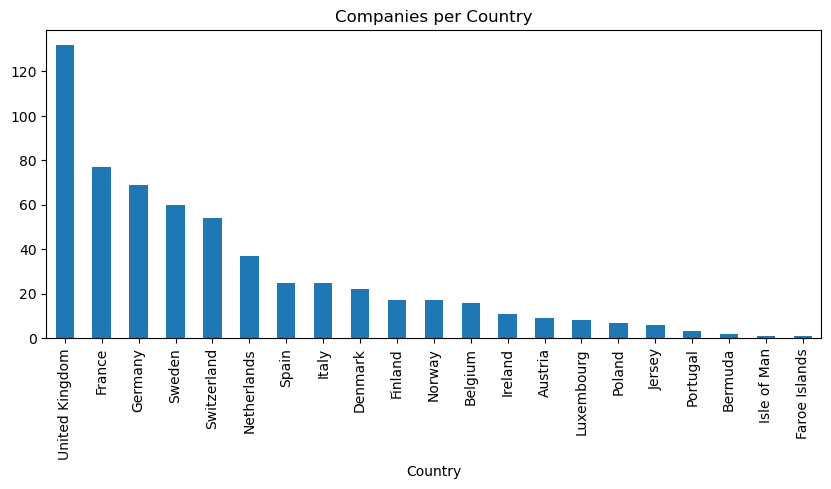

In [79]:
df_ratios.groupby("Country")["Company"].nunique().sort_values(ascending=False).plot(kind="bar", figsize=(10,4), title="Companies per Country")


In [80]:
#------------------------
# Top 5 countries over time
#-----------------------
import matplotlib.pyplot as plt

def company_year_analysis(df):
    metrics = [
        "ROA", "ROE","EBITDA_Margin"
    ]

    # 1. Company-Year summary
    company_year_table = (
        df.groupby(["Company", "Year"])[metrics]
          .first()
          .round(2)
          .sort_index()
    )

    print("\n===== Company-Year Financial Summary =====\n")
    print(company_year_table)

    # 2. Top 5 companies
    top5_companies = (
        df["Company"].value_counts()
          .head(5)
          .index
    )

    print("\nTop 5 Companies:", list(top5_companies))

    # 3. Trend charts for ROE, ROA, D/E for top 5
    trend_metrics = ["ROA", "ROE", "EBITDA_Margin"]

    for metric in trend_metrics:
        plt.figure(figsize=(8, 4))
        for company in top5_companies:
            temp = df[df["Company"] == company]
            yearly = temp.set_index("Year")[metric]
            plt.plot(yearly.index, yearly.values,
                     marker="o", label=company)

        plt.title(f"{metric} Trend Over Time – Top 5 Companies")
        plt.xlabel("Year")
        plt.ylabel(metric)
        plt.grid(True)
        plt.legend()
        plt.show()

    return company_year_table



===== Company-Year Financial Summary =====

                              ROA   ROE  EBITDA_Margin
Company                Year                           
3I GROUP               2021  0.25  0.20           2.58
                       2022  0.38  0.31           1.69
                       2023  0.32  0.27           1.68
A P MOLLER MAERSK B    2021  0.04  0.39           0.39
                       2022  0.05  0.46           0.45
...                           ...   ...            ...
ZALANDO (XET)          2022  0.00  0.01           0.04
                       2023  0.01  0.03           0.05
ZURICH INSURANCE GROUP 2021  0.01  0.15           0.12
                       2022  0.01  0.14           0.17
                       2023  0.02  0.16           0.12

[1797 rows x 3 columns]

Top 5 Companies: ['3I GROUP', 'BANK POLSKA KASA OPIEKI', 'PERNOD-RICARD', 'PERSIMMON', 'PHILIPS ELTN.KONINKLIJKE']


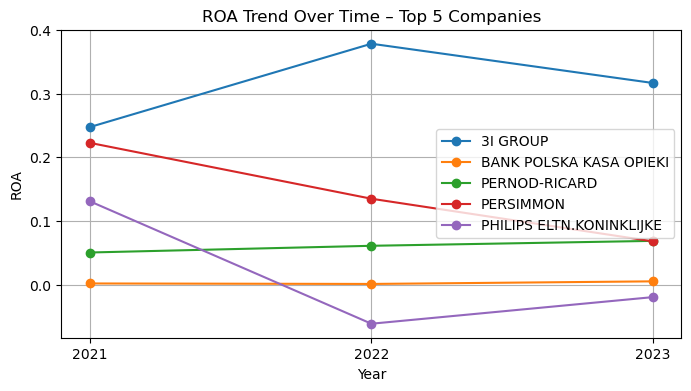

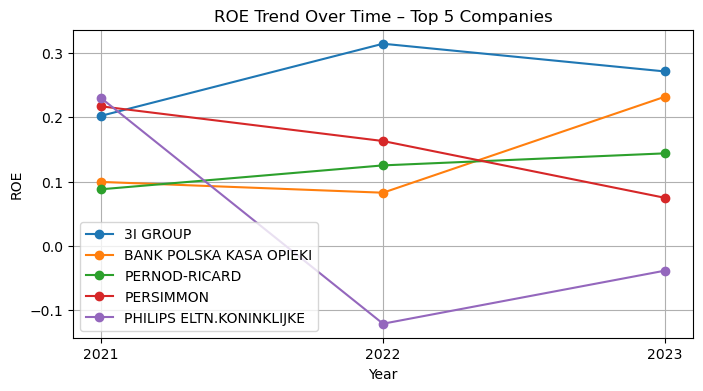

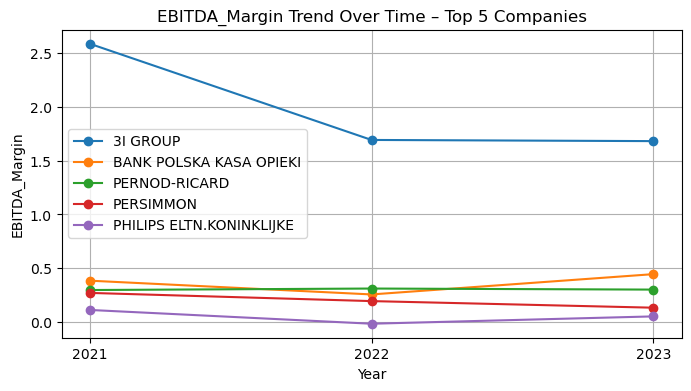

ROA   ROE  EBITDA_Margin
Company                Year                           
3I GROUP               2021  0.25  0.20           2.58
                       2022  0.38  0.31           1.69
                       2023  0.32  0.27           1.68
A P MOLLER MAERSK B    2021  0.04  0.39           0.39
                       2022  0.05  0.46           0.45
...                           ...   ...            ...
ZALANDO (XET)          2022  0.00  0.01           0.04
                       2023  0.01  0.03           0.05
ZURICH INSURANCE GROUP 2021  0.01  0.15           0.12
                       2022  0.01  0.14           0.17
                       2023  0.02  0.16           0.12

[1797 rows x 3 columns]

In [81]:
company_year_analysis(df)
